In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv("C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/AddisAbaba_to_UTC_withGEOSCF.csv")
ds

Datetime_UTC         Datetime  PM2.5  PM2.5_GEOSCF  t2m_GEOSCF  \
0        2/1/2020 0:00    2/1/2020 3:00     25     65.079575   286.00894   
1        2/1/2020 1:00    2/1/2020 4:00     27     69.942110   285.95764   
2        2/1/2020 2:00    2/1/2020 5:00     22     79.558556   285.93045   
3        2/1/2020 3:00    2/1/2020 6:00     27     91.440340   285.92422   
4        2/1/2020 4:00    2/1/2020 7:00     28     91.201310   286.27036   
...                ...              ...    ...           ...         ...   
34335   1/31/2025 9:00  1/31/2025 12:00     17     12.698269   296.44820   
34336  1/31/2025 17:00  1/31/2025 20:00      9     22.487297   284.06757   
34337  1/31/2025 18:00  1/31/2025 21:00      9     25.042168   283.30273   
34338  1/31/2025 20:00  1/31/2025 23:00     54     29.658094   282.41687   
34339  1/31/2025 21:00    2/1/2025 0:00     27           NaN         NaN   

       rh_GEOSCF  u10m_GEOSCF  v10m_GEOSCF  
0       0.957192    -0.845622     0.645358  
1       0.958268    -0.685555     0.406450  
2       0.958172    -0.610553     0.192871  
3       0.958648    -0.644347     0.382718  
4       0.958701    -0.989201     0.803287  
...          ...          ...          ...  
34335   0.321637    -3.614775     2.012233  
34336   0.559754    -2.496142     0.453185  
34337   0.581710    -2.431979     0.135296  
34338   0.610587    -2.178039    -0.015952  
34339        NaN          NaN          NaN  

[34340 rows x 8 columns]

In [7]:
import os
import pandas as pd

# Path to the folder with all the raw datasets
data_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/"

# Collect all descriptions
all_descriptions = []

# Loop through all CSV files in the folder
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(data_folder, file)
        try:
            df = pd.read_csv(file_path)

            # Basic cleanup: drop unnamed columns if present
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

            # Describe the dataset
            desc = df.describe().transpose()
            desc.insert(0, "Location", file.replace(".csv", ""))  # Add location info

            # Store in list
            all_descriptions.append(desc)

            # Print the description
            print(f"📄 Description for: {file}")
            print(desc)
            print("-" * 80)

        except Exception as e:
            print(f"❌ Failed to load {file}: {e}")

# Combine all into one DataFrame
summary_df = pd.concat(all_descriptions)

# Save to CSV (optional)
#summary_df.to_csv(os.path.join(data_folder, "Summary_Descriptions_All_Locations.csv"))

print("\n✅ All dataset descriptions generated and saved.")


📄 Description for: Abidjan_to_UTC_withGEOSCF.csv
                               Location    count        mean        std  \
PM2.5         Abidjan_to_UTC_withGEOSCF  35808.0   26.356166  21.727257   
PM2.5_GEOSCF  Abidjan_to_UTC_withGEOSCF  35807.0   23.623341  22.625972   
t2m_GEOSCF    Abidjan_to_UTC_withGEOSCF  35807.0  300.415805   1.837598   
rh_GEOSCF     Abidjan_to_UTC_withGEOSCF  35807.0    0.772166   0.181685   
u10m_GEOSCF   Abidjan_to_UTC_withGEOSCF  35807.0    1.530512   1.336068   
v10m_GEOSCF   Abidjan_to_UTC_withGEOSCF  35807.0    3.175931   1.212249   

                     min         25%         50%         75%         max  
PM2.5           5.000000   13.000000   21.000000   32.000000  360.000000  
PM2.5_GEOSCF    3.420488   10.191887   15.315921   28.202194  245.443390  
t2m_GEOSCF    294.500030  299.278125  300.296330  301.487680  307.609830  
rh_GEOSCF       0.000000    0.752195    0.815349    0.857740    0.988847  
u10m_GEOSCF    -6.553865    0.732804    1.614318  

In [8]:
import os
import pandas as pd

# Folder containing original CSV files
data_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/"
cleaned_folder = os.path.join(data_folder, "CLEANED")
os.makedirs(cleaned_folder, exist_ok=True)

# Loop through all CSV files
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(data_folder, file)
        try:
            df = pd.read_csv(file_path)

            # Drop unnamed columns (like "Unnamed: 0")
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

            # Drop rows where PM2.5 is invalid
            df = df[(df['PM2.5'] >= 0) & (df['PM2.5'] <= 1000)]

            # Drop all rows with NaNs
            df = df.dropna()

            # Convert RH from ratio to percentage if the column exists
            if 'rh_GEOSCF' in df.columns:
                df['rh_GEOSCF'] = df['rh_GEOSCF'] * 100

            # Save cleaned file
            clean_name = file.replace(".csv", "_cleaned.csv")
            df.to_csv(os.path.join(cleaned_folder, clean_name), index=False)

            print(f"✅ Cleaned and saved: {clean_name}")

        except Exception as e:
            print(f"❌ Failed to process {file}: {e}")


✅ Cleaned and saved: Abidjan_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Abuja_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Accra_PM2.5_2020_2025_withGEOSCF_cleaned.csv
✅ Cleaned and saved: AddisAbaba_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Algiers_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Antananarivo_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Bamako_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Cairo_PM2.5_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Conakry_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Dakar_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Kampala_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Kigali_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Kinshasa_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Lagos_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Libreville_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: Lome_to_UTC_withGEOSCF_cleaned.csv
✅ Cleaned and saved: NDjamena_to_UTC_withGEOSCF

In [9]:
import os
import pandas as pd

# Set path to folder containing cleaned CSV files
cleaned_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/CLEANED/"

# Dictionary to store results
descriptions = {}

# Loop through all files in the directory
for file in os.listdir(cleaned_folder):
    if file.endswith("_cleaned.csv"):
        file_path = os.path.join(cleaned_folder, file)
        df = pd.read_csv(file_path)

        # Try to find a datetime column
        date_range = None
        for col in df.columns:
            try:
                parsed_dates = pd.to_datetime(df[col], errors='coerce')
                if parsed_dates.notnull().sum() > 0:
                    date_range = (parsed_dates.min(), parsed_dates.max())
                    break
            except:
                continue

        # Get summary statistics
        summary = df.describe()

        # Save summary and date range
        descriptions[file] = {
            "summary": summary,
            "date_range": date_range
        }

# Print all descriptions
for file, content in descriptions.items():
    print(f"\n📄 Description for: {file}")
    if content["date_range"]:
        print(f"📅 Date Range: {content['date_range'][0]} to {content['date_range'][1]}")
    else:
        print("📅 Date Range: Not found")
    print(content["summary"])
    print("-" * 80)



📄 Description for: Abidjan_to_UTC_withGEOSCF_cleaned.csv
📅 Date Range: 2020-02-05 11:00:00 to 2025-01-31 23:00:00
              PM2.5  PM2.5_GEOSCF    t2m_GEOSCF     rh_GEOSCF   u10m_GEOSCF  \
count  35807.000000  35807.000000  35807.000000  35807.000000  35807.000000   
mean      26.356098     23.623341    300.415805     77.216618      1.530512   
std       21.727556     22.625972      1.837598     18.168472      1.336068   
min        5.000000      3.420488    294.500030      0.000000     -6.553865   
25%       13.000000     10.191887    299.278125     75.219525      0.732804   
50%       21.000000     15.315921    300.296330     81.534850      1.614318   
75%       32.000000     28.202194    301.487680     85.774002      2.420927   
max      360.000000    245.443390    307.609830     98.884726      7.509690   

        v10m_GEOSCF  
count  35807.000000  
mean       3.175931  
std        1.212249  
min       -3.811815  
25%        2.529949  
50%        3.202716  
75%        3.910003

In [11]:
import os
import pandas as pd

# Folder containing the cleaned data
cleaned_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/CLEANED"

# Store start and end times
time_ranges = []

# Loop through all CSV files in the folder
for file in os.listdir(cleaned_folder):
    if file.endswith("_cleaned.csv"):
        file_path = os.path.join(cleaned_folder, file)
        df = pd.read_csv(file_path)

        # Ensure datetime is parsed correctly
        df['Datetime'] = pd.to_datetime(df['Datetime'])

        start_date = df['Datetime'].min()
        end_date = df['Datetime'].max()

        time_ranges.append({
            "Location": file.replace("_cleaned.csv", ""),
            "Start_Datetime": start_date,
            "End_Datetime": end_date
        })

# Create a summary DataFrame
time_summary = pd.DataFrame(time_ranges)

# Show the summary
print(time_summary)

# Optional: Save the summary to CSV
output_path = os.path.join(cleaned_folder, "Cleaned_Location_Time_Ranges.csv")
time_summary.to_csv(output_path, index=False)

print("✅ Start and end times extracted for all cleaned locations.")


                            Location      Start_Datetime        End_Datetime
0          Abidjan_to_UTC_withGEOSCF 2020-02-05 11:00:00 2025-01-31 23:00:00
1            Abuja_to_UTC_withGEOSCF 2021-02-12 21:00:00 2025-01-31 23:00:00
2   Accra_PM2.5_2020_2025_withGEOSCF 2020-02-01 00:00:00 2025-01-30 17:00:00
3       AddisAbaba_to_UTC_withGEOSCF 2020-02-01 03:00:00 2025-01-31 23:00:00
4          Algiers_to_UTC_withGEOSCF 2020-02-01 01:00:00 2025-01-31 23:00:00
5     Antananarivo_to_UTC_withGEOSCF 2020-02-01 03:00:00 2025-01-31 20:00:00
6           Bamako_to_UTC_withGEOSCF 2020-02-01 00:00:00 2023-10-17 13:00:00
7         Cairo_PM2.5_UTC_withGEOSCF 2022-05-25 13:00:00 2025-01-31 23:00:00
8          Conakry_to_UTC_withGEOSCF 2020-02-01 00:00:00 2025-01-28 14:00:00
9            Dakar_to_UTC_withGEOSCF 2022-03-30 13:00:00 2024-09-24 01:00:00
10         Kampala_to_UTC_withGEOSCF 2020-02-01 03:00:00 2025-01-31 23:00:00
11          Kigali_to_UTC_withGEOSCF 2022-02-14 13:00:00 2025-01-31 23:00:00

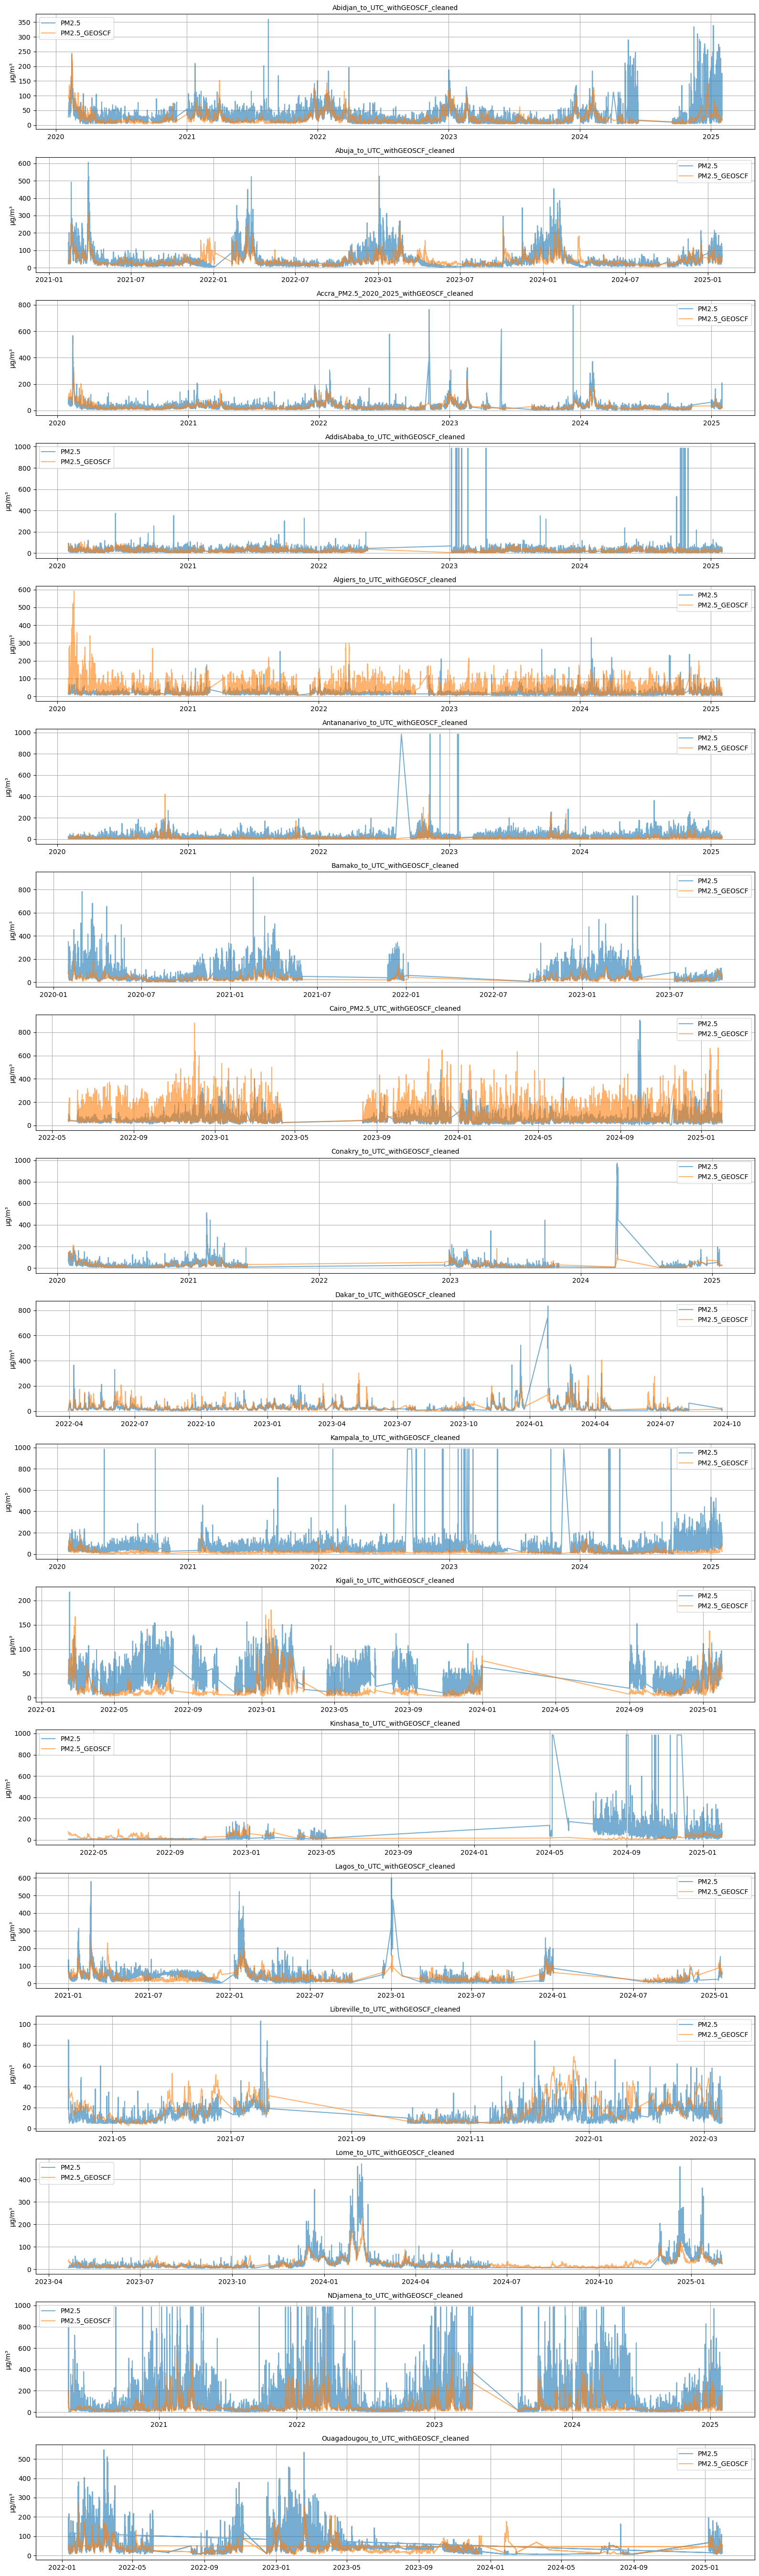

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing the cleaned CSV files
processed_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/DATA/CLEANED"

# Collect data from all files
location_data = []
for file in os.listdir(processed_folder):
    if file.endswith(".csv") and "withGEOSCF" in file:
        path = os.path.join(processed_folder, file)
        df = pd.read_csv(path)
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        location_name = file.replace(".csv", "")
        location_data.append((location_name, df))

# Plotting
num_locations = len(location_data)
fig, axes = plt.subplots(num_locations, 1, figsize=(16, num_locations * 3), sharex=False)

if num_locations == 1:
    axes = [axes]  # Make iterable if only one subplot

for i, (location, df) in enumerate(location_data):
    ax = axes[i]
    ax.plot(df['Datetime'], df['PM2.5'], label='PM2.5', color='tab:blue', alpha=0.6)
    ax.plot(df['Datetime'], df['PM2.5_GEOSCF'], label='PM2.5_GEOSCF', color='tab:orange', alpha=0.6)
    ax.set_title(location, fontsize=10)
    ax.set_ylabel("µg/m³")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


C:\Users\ampon\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ampon\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ampon\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ampon\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

          City      R     R2     MAE     RMSE
0      Abidjan  0.578  0.198  10.283   17.916
1        Abuja  0.573  0.321  21.203   35.285
2        Accra  0.743  0.544  12.153   24.592
3      Conakry  0.447  0.199  13.949   45.178
4        Dakar  0.536  0.182  19.113   36.662
5        Lagos  0.611  0.319  14.921   25.034
6     NDjamena  0.467  0.020  69.866  144.281
7  Ouagadougou  0.362 -0.008  25.855   45.761


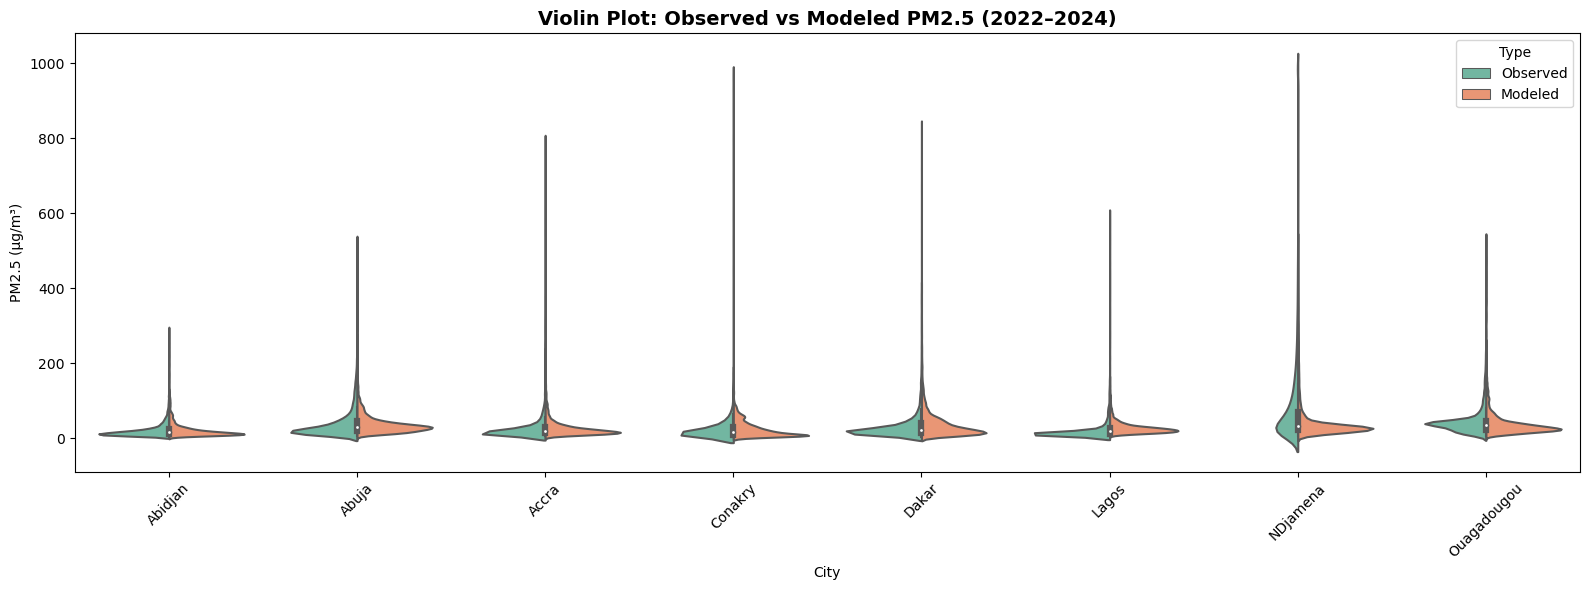

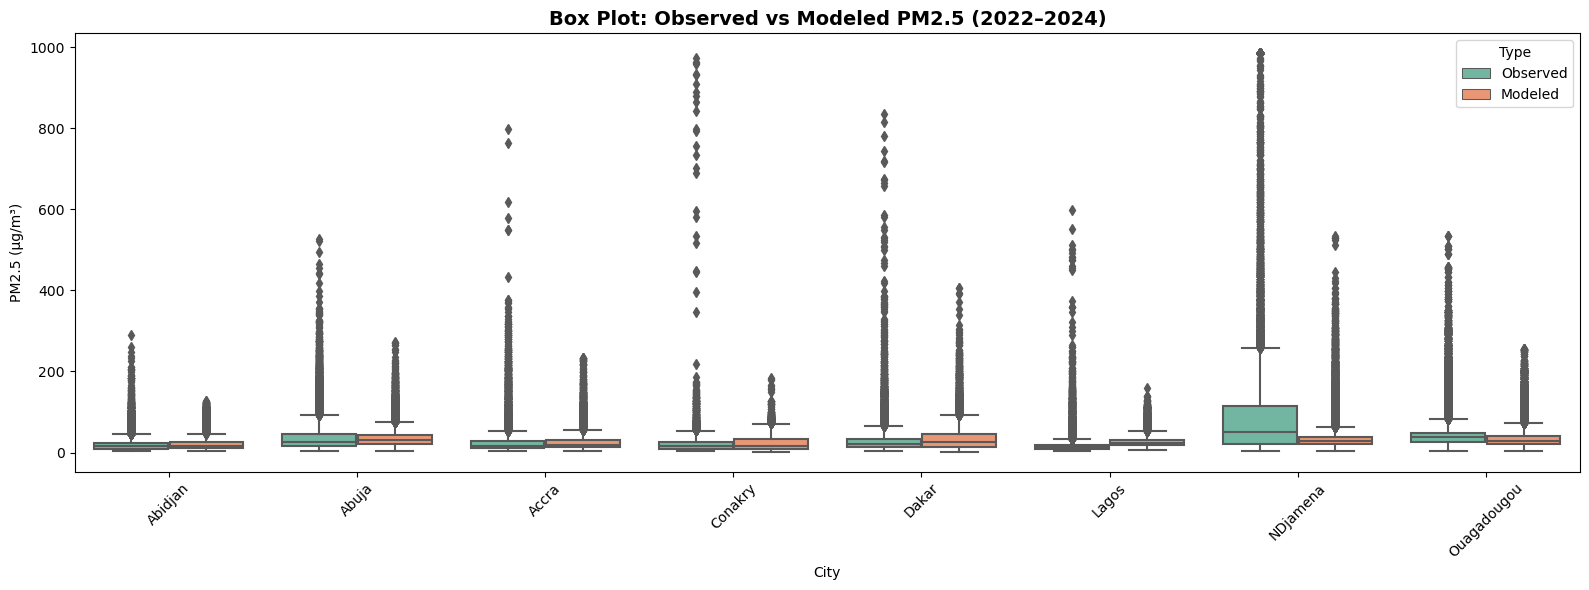

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# Folder with processed files
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"

# Date filter
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

# Files
cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

metrics_list = []
violin_data = []

for city, filename in cities.items():
    df = pd.read_csv(os.path.join(folder, filename), parse_dates=["Datetime"])
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    obs = df["PM2.5"]
    mod = df["PM2.5_GEOSCF"]

    # Metrics
    r, _ = pearsonr(obs, mod) if len(obs) > 2 else (np.nan, None)
    r2 = r2_score(obs, mod)
    rmse = mean_squared_error(obs, mod, squared=False)
    mae = mean_absolute_error(obs, mod)

    metrics_list.append({
        "City": city,
        "R": round(r, 3),
        "R2": round(r2, 3),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3)
    })

    # Add to violin data
    violin_data.extend([
        {"City": city, "Type": "Observed", "PM2.5": val} for val in obs
    ] + [
        {"City": city, "Type": "Modeled", "PM2.5": val} for val in mod
    ])

# Convert to DataFrames
metrics_df = pd.DataFrame(metrics_list)
violin_df = pd.DataFrame(violin_data)

# Show metrics table
print(metrics_df)

# Plot: Violin Plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=violin_df, x="City", y="PM2.5", hue="Type", split=True, palette="Set2")
plt.title("Violin Plot: Observed vs Modeled PM2.5 (2022–2024)", fontsize=14, fontweight='bold')
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Type')
plt.show()

# Plot: Box Plot
plt.figure(figsize=(16, 6))
sns.boxplot(data=violin_df, x="City", y="PM2.5", hue="Type", palette="Set2")
plt.title("Box Plot: Observed vs Modeled PM2.5 (2022–2024)", fontsize=14, fontweight='bold')
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Type')
plt.show()


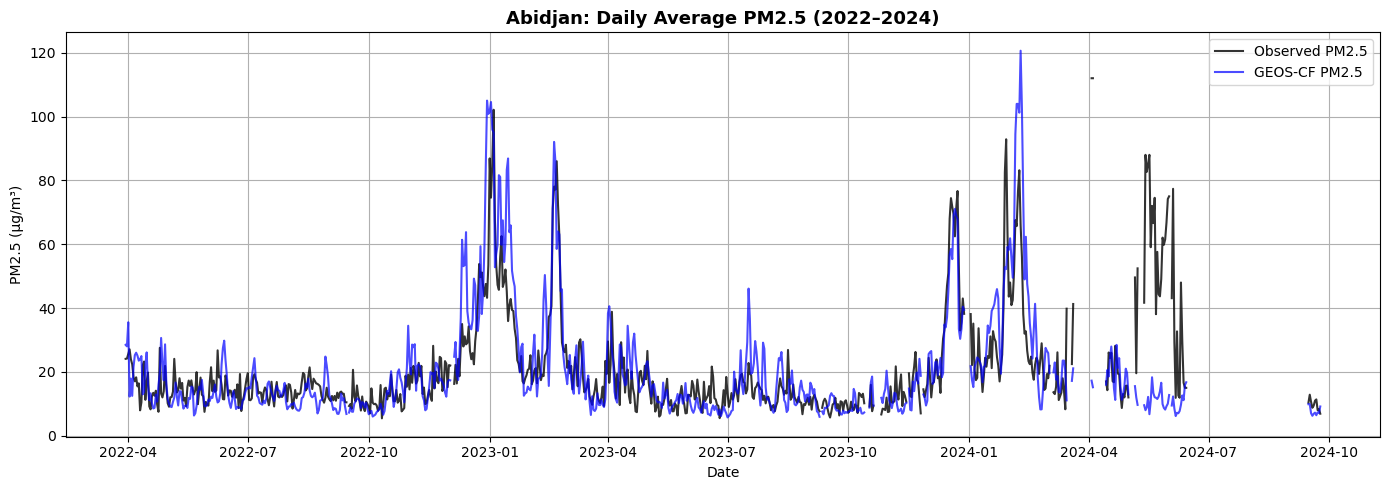

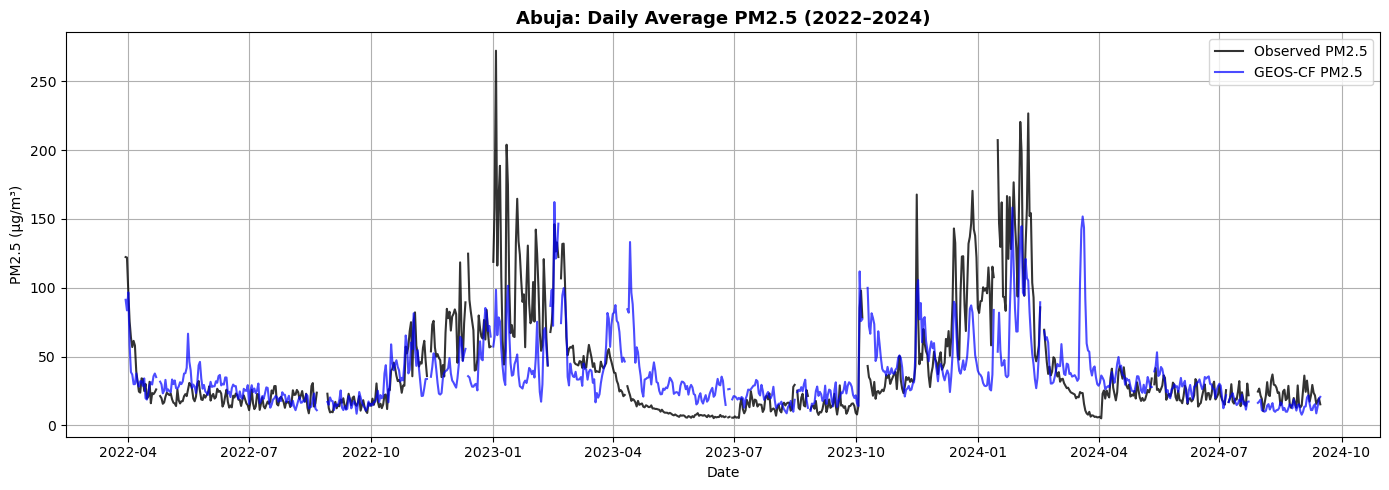

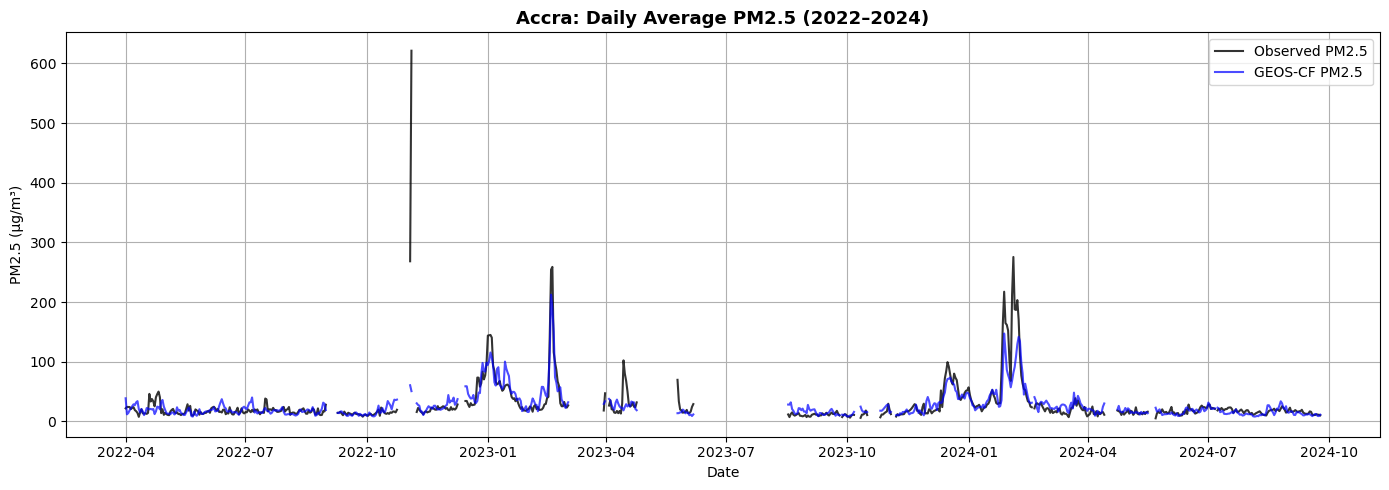

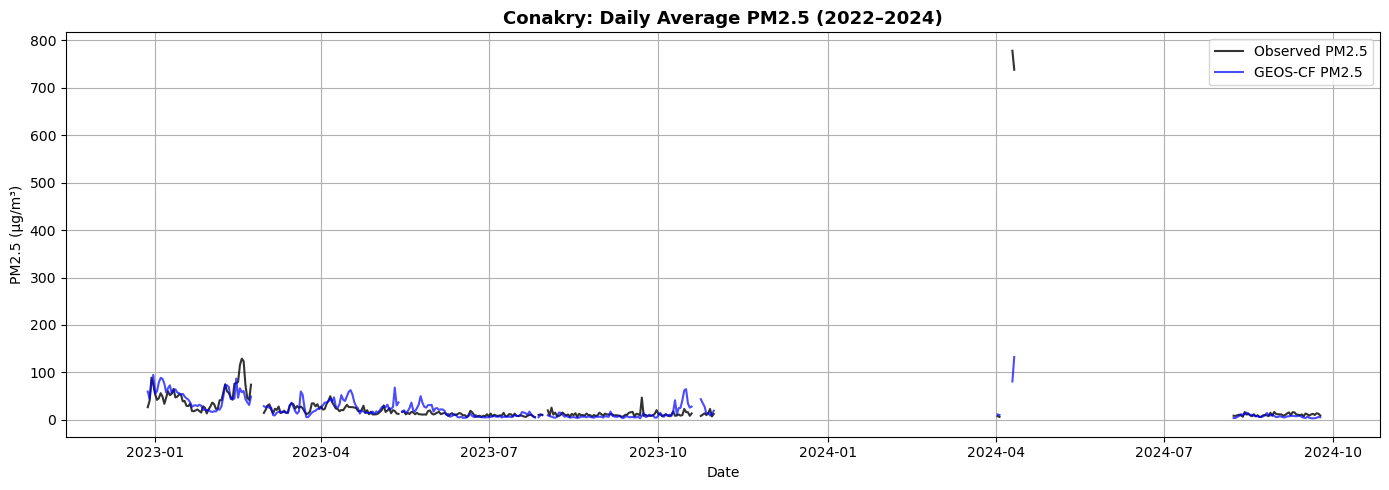

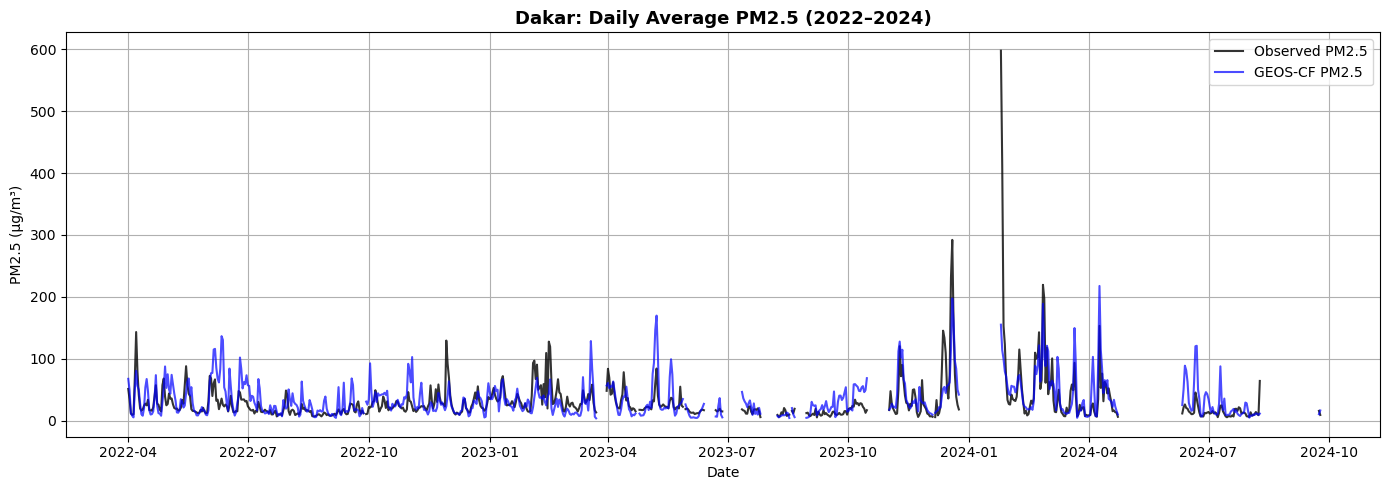

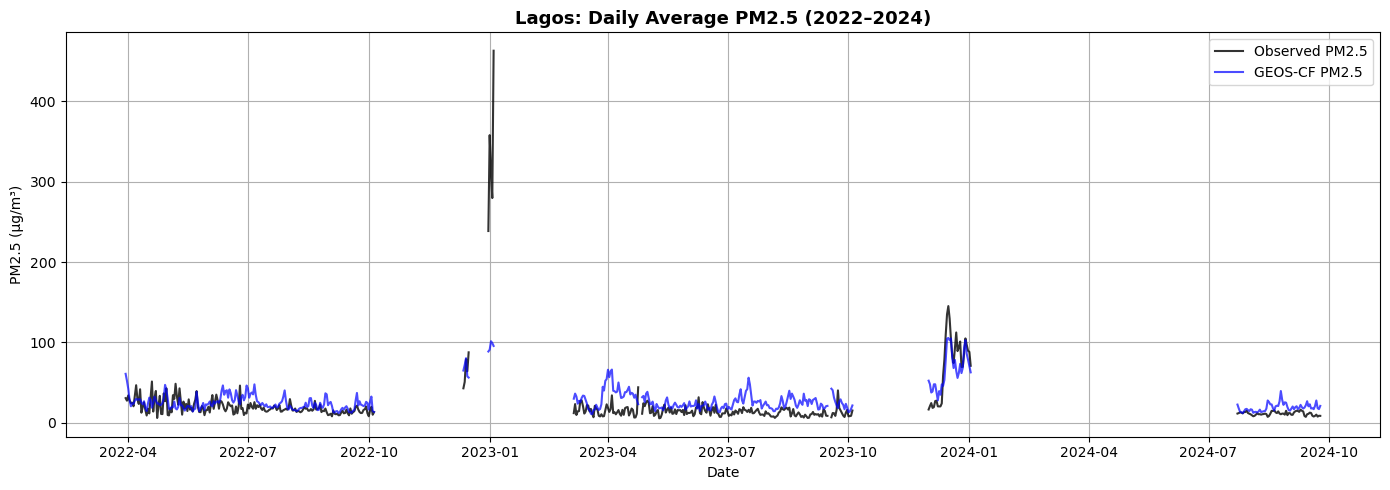

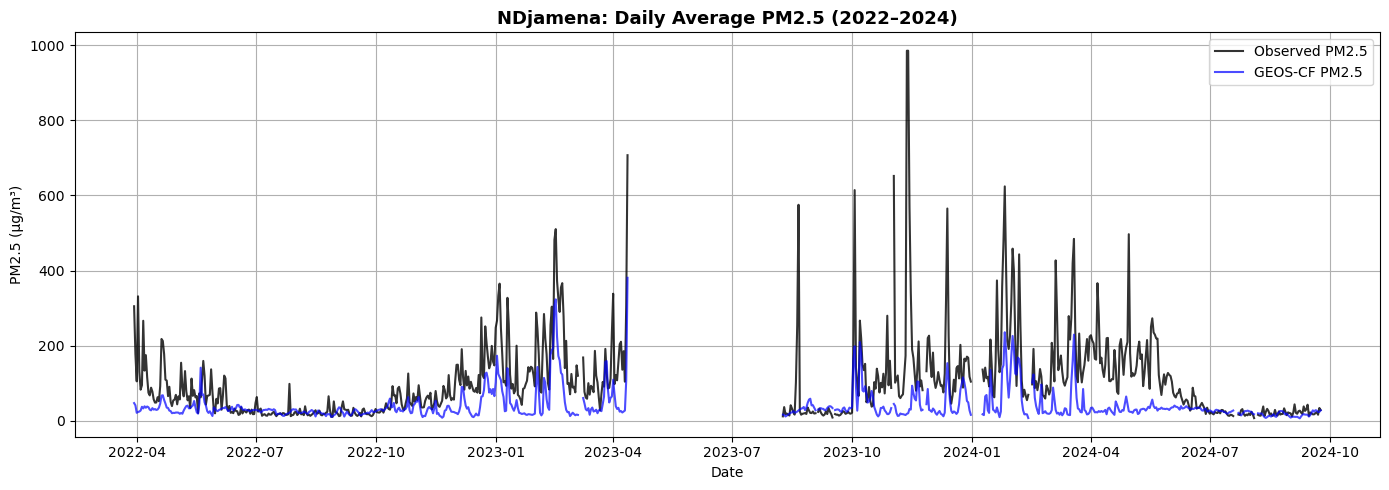

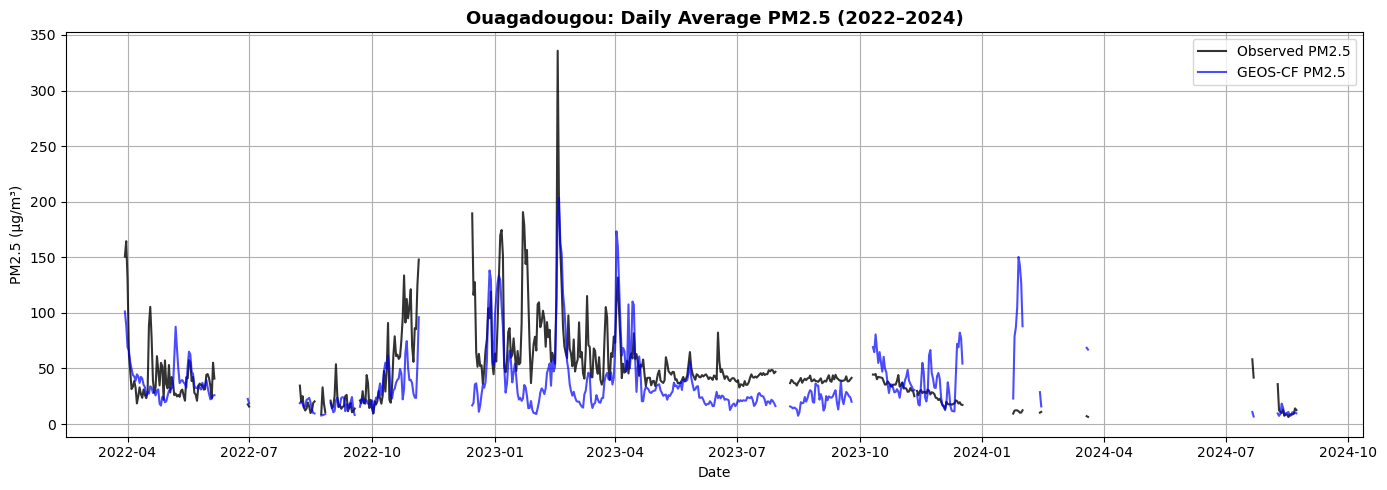

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Setup
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

for city, file in cities.items():
    path = os.path.join(folder, file)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter by date
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    # Resample to daily means
    daily = df.resample("D", on="Datetime").mean()

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(daily.index, daily["PM2.5"], label="Observed PM2.5", color="black", alpha=0.8)
    plt.plot(daily.index, daily["PM2.5_GEOSCF"], label="GEOS-CF PM2.5", color="blue", alpha=0.7)

    plt.title(f"{city}: Daily Average PM2.5 (2022–2024)", fontsize=13, fontweight='bold')
    plt.ylabel("PM2.5 (µg/m³)")
    plt.xlabel("Date")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


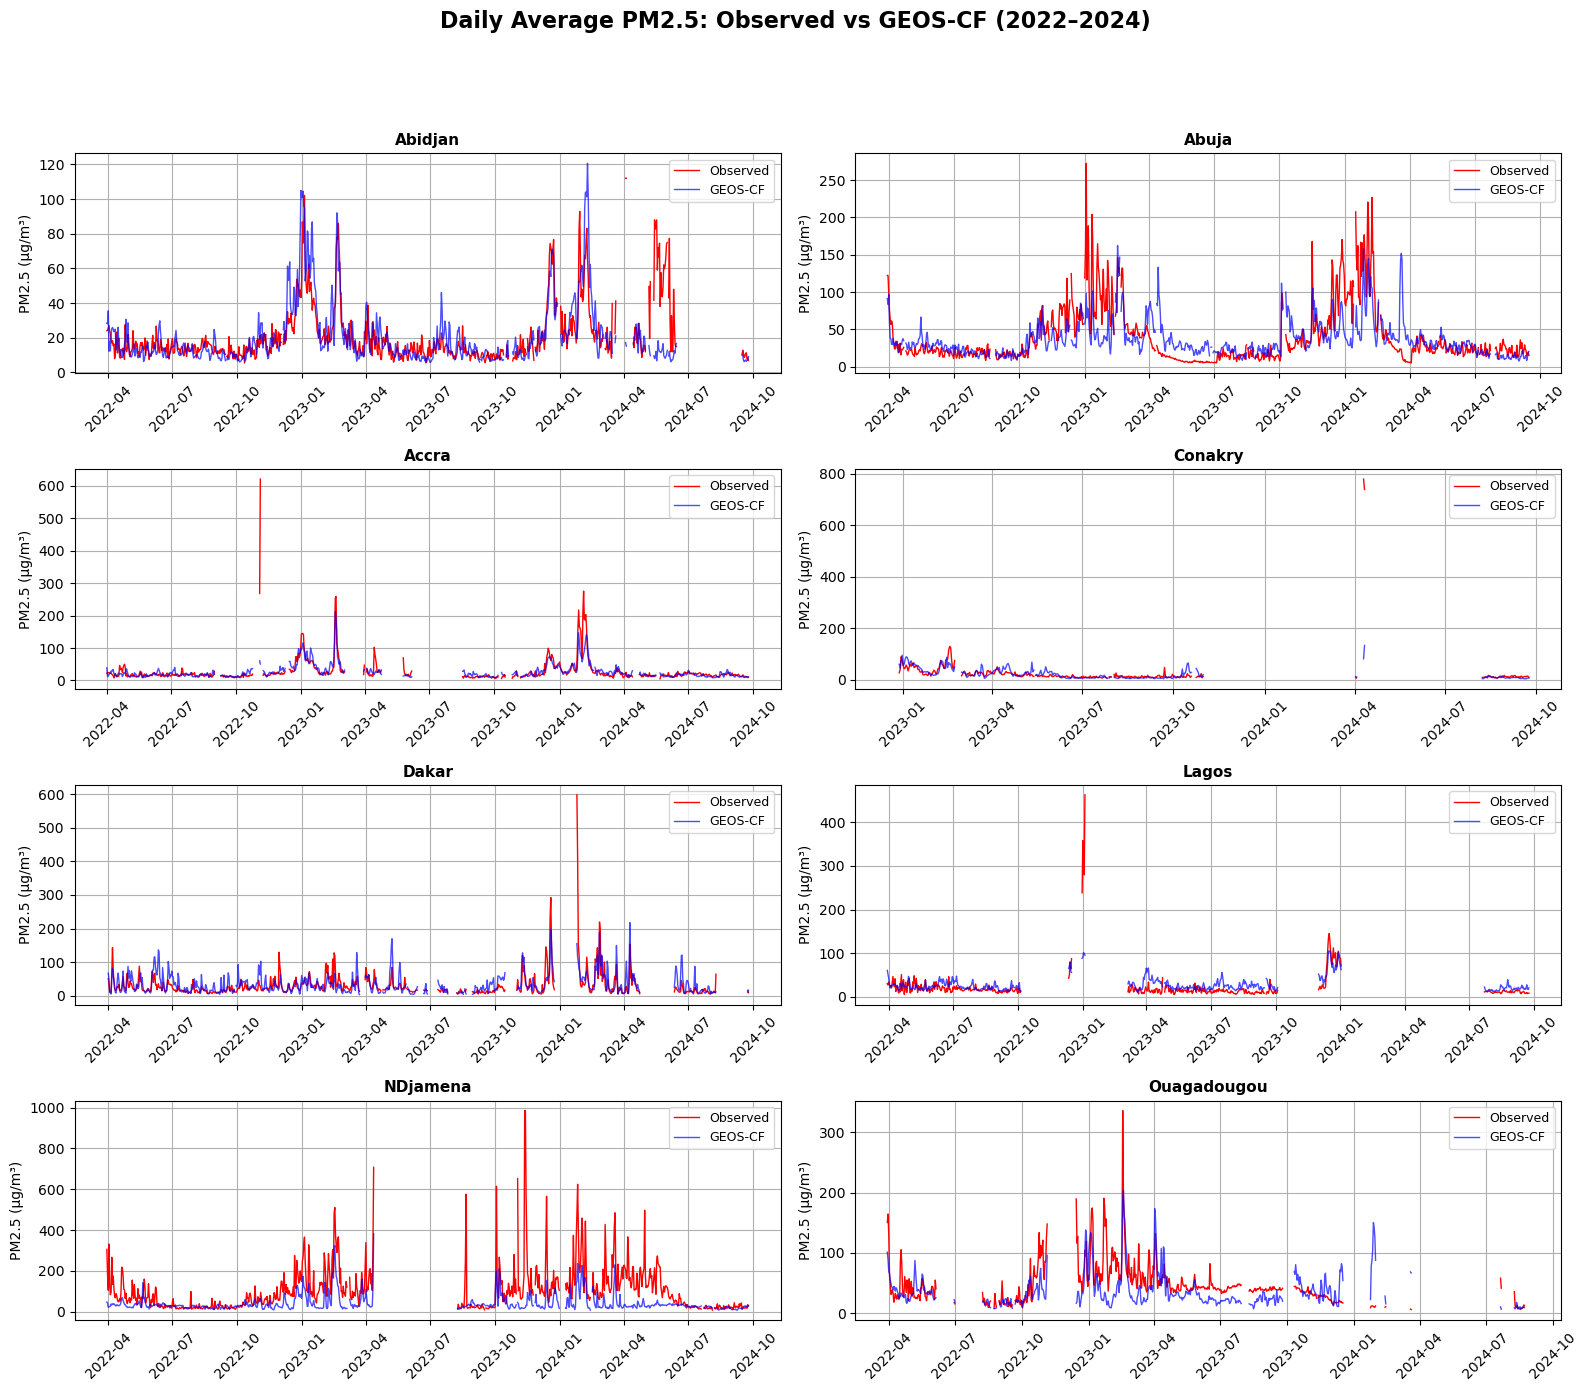

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Prepare subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False, sharey=False)
axs = axs.flatten()

# === Loop through each city ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and clean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    # Resample daily
    daily = df.resample("D", on="Datetime").mean()

    # Plot on subplot
    ax = axs[i]
    ax.plot(daily.index, daily["PM2.5"], label="Observed", color="red", linewidth=1)
    ax.plot(daily.index, daily["PM2.5_GEOSCF"], label="GEOS-CF", color="blue", linewidth=1, alpha=0.7)
    ax.set_title(city, fontsize=11, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend(fontsize=9)

# === Final layout ===
fig.suptitle("Daily Average PM2.5: Observed vs GEOS-CF (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


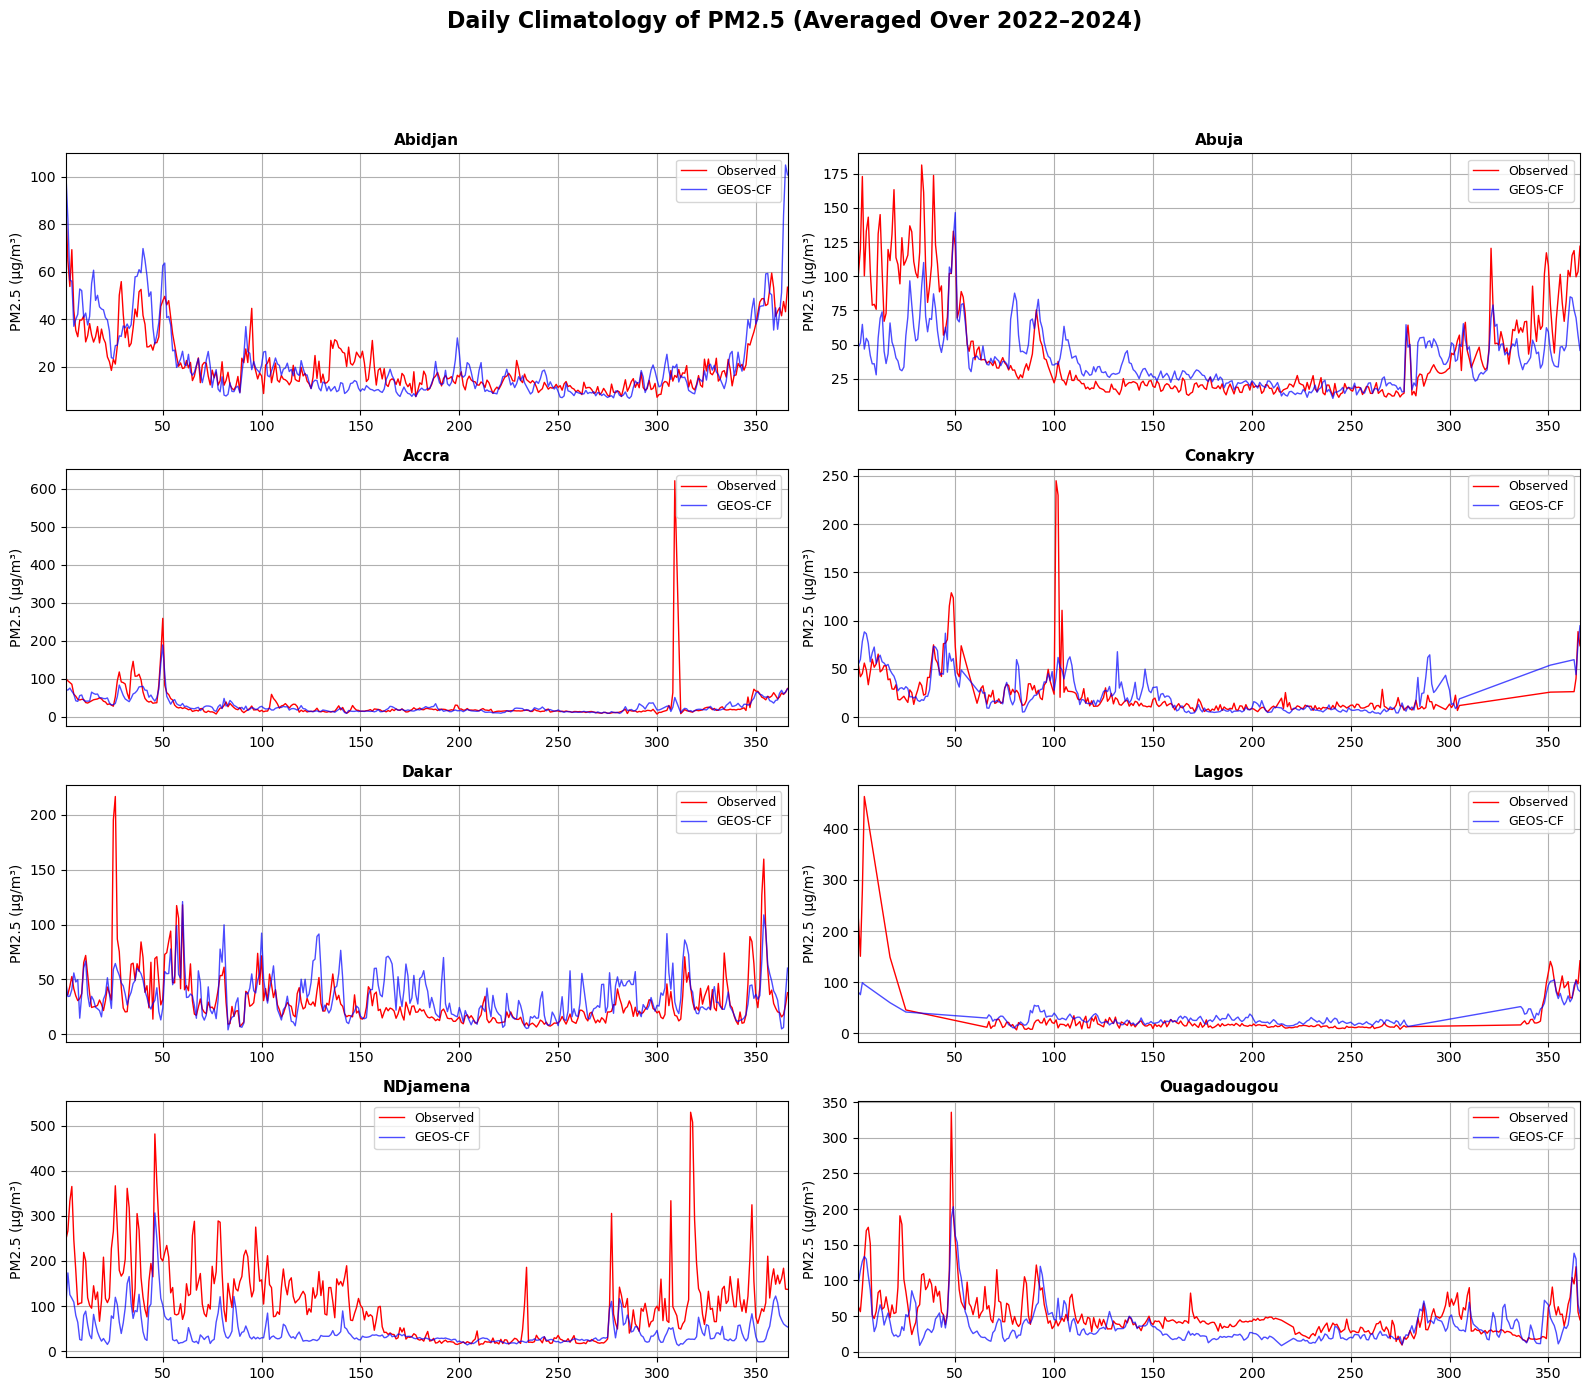

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False, sharey=False)
axs = axs.flatten()

for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and clean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    # Extract month and day
    df["Month"] = df["Datetime"].dt.month
    df["Day"] = df["Datetime"].dt.day

    # Group by day of year (month, day) across all years
    daily_clim = df.groupby(["Month", "Day"])[["PM2.5", "PM2.5_GEOSCF"]].mean().reset_index()

    # Create a day-of-year index (1 to 366)
    daily_clim["DOY"] = pd.to_datetime(dict(year=2020, month=daily_clim["Month"], day=daily_clim["Day"])).dt.dayofyear

    # Sort to ensure proper order
    daily_clim = daily_clim.sort_values("DOY")

    # Plot
    ax = axs[i]
    ax.plot(daily_clim["DOY"], daily_clim["PM2.5"], label="Observed", color="red", linewidth=1)
    ax.plot(daily_clim["DOY"], daily_clim["PM2.5_GEOSCF"], label="GEOS-CF", color="blue", linewidth=1, alpha=0.7)

    ax.set_title(city, fontsize=11, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.grid(True)
    ax.set_xlim(1, 366)
    ax.legend(fontsize=9)

# === Final layout ===
fig.suptitle("Daily Climatology of PM2.5 (Averaged Over 2022–2024)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


C:\Users\ampon\AppData\Local\Temp\ipykernel_9128\1483710878.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="Datetime").mean()
C:\Users\ampon\AppData\Local\Temp\ipykernel_9128\1483710878.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="Datetime").mean()
C:\Users\ampon\AppData\Local\Temp\ipykernel_9128\1483710878.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="Datetime").mean()
C:\Users\ampon\AppData\Local\Temp\ipykernel_9128\1483710878.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample("M", on="Datetime").mean()
C:\Users\ampon\AppData\Local\Temp\ipykernel_9128\1483710878.py:35: FutureWarning: 'M' is deprecated and will be removed in a future 

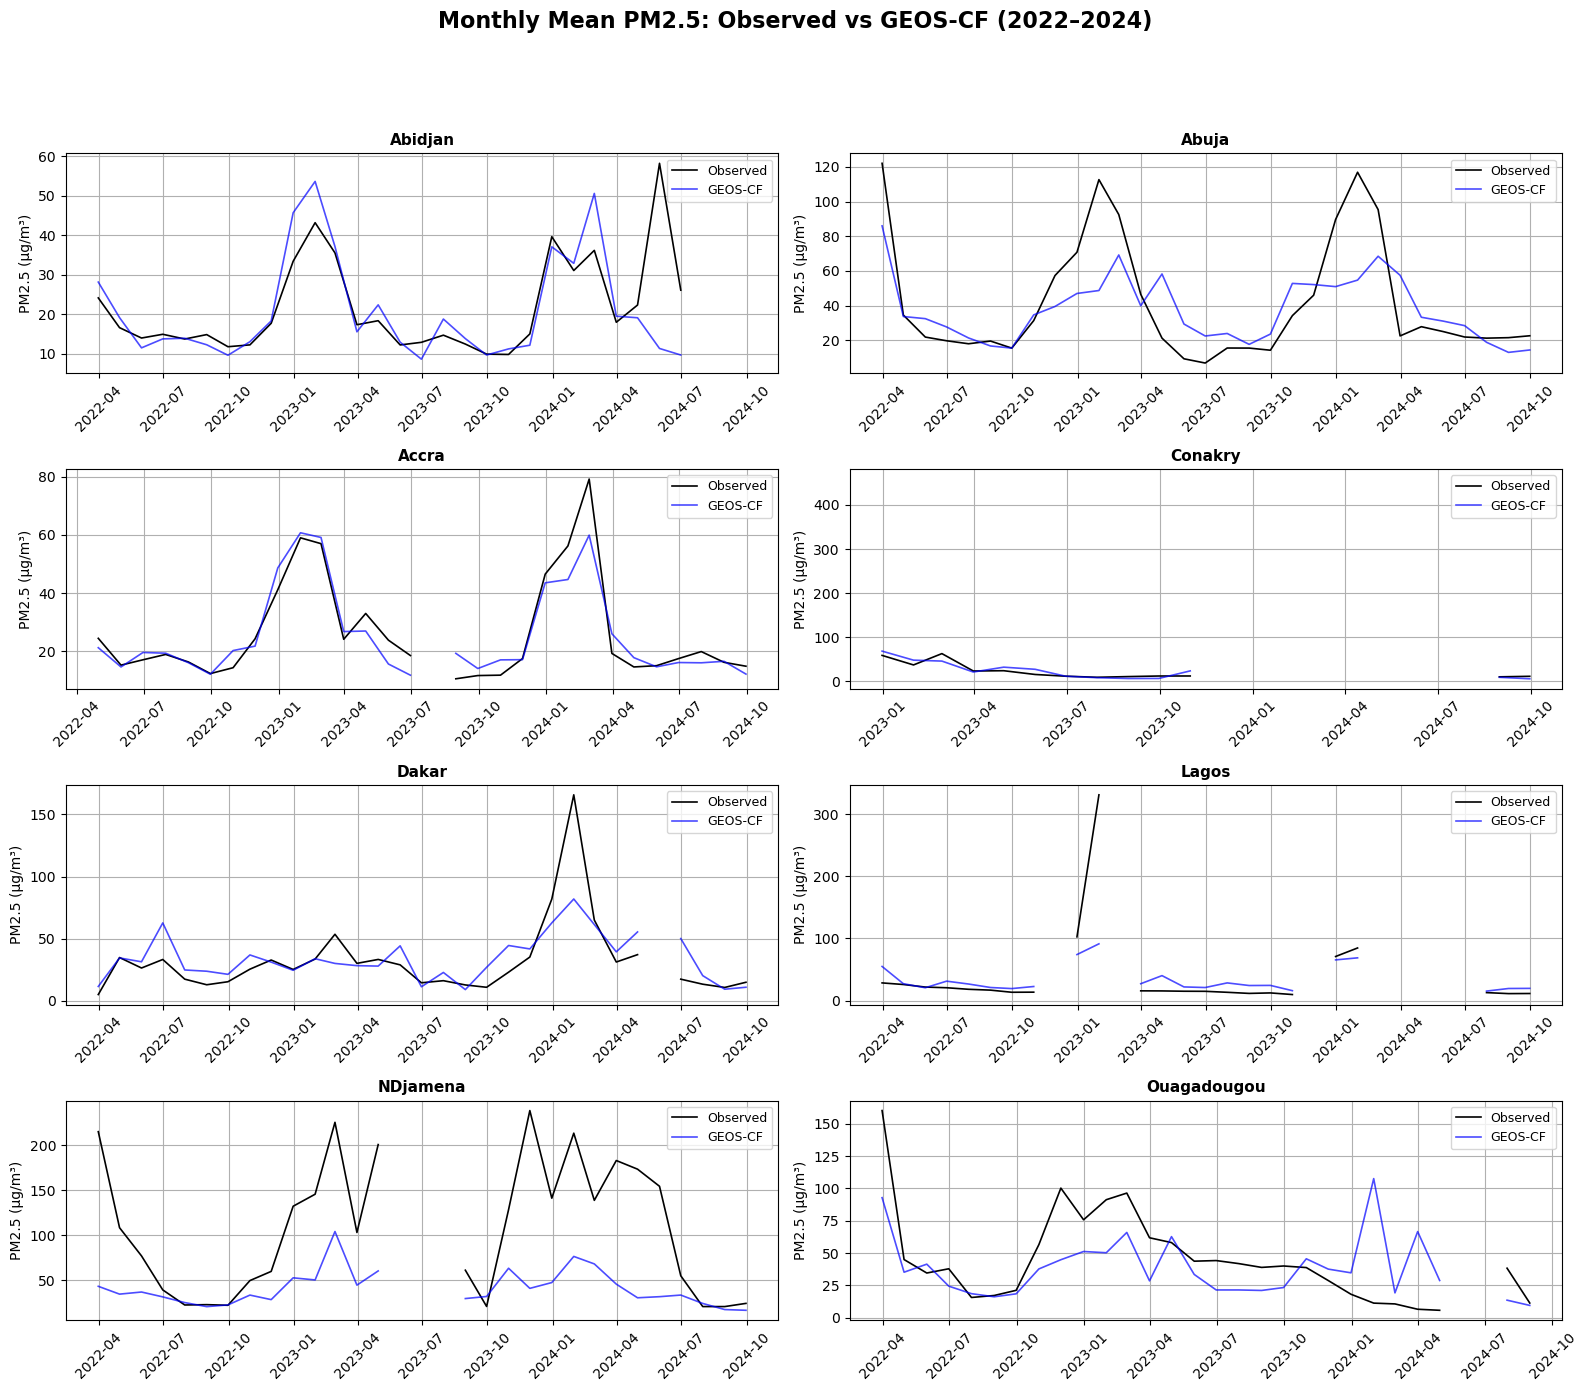

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Create subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False, sharey=False)
axs = axs.flatten()

# === Loop through cities ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter date range
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    # Resample to monthly mean
    monthly = df.resample("M", on="Datetime").mean()

    # Plot
    ax = axs[i]
    ax.plot(monthly.index, monthly["PM2.5"], label="Observed", color="black", linewidth=1.2)
    ax.plot(monthly.index, monthly["PM2.5_GEOSCF"], label="GEOS-CF", color="blue", linewidth=1.2, alpha=0.7)
    ax.set_title(city, fontsize=11, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend(fontsize=9)

# === Final Layout ===
fig.suptitle("Monthly Mean PM2.5: Observed vs GEOS-CF (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


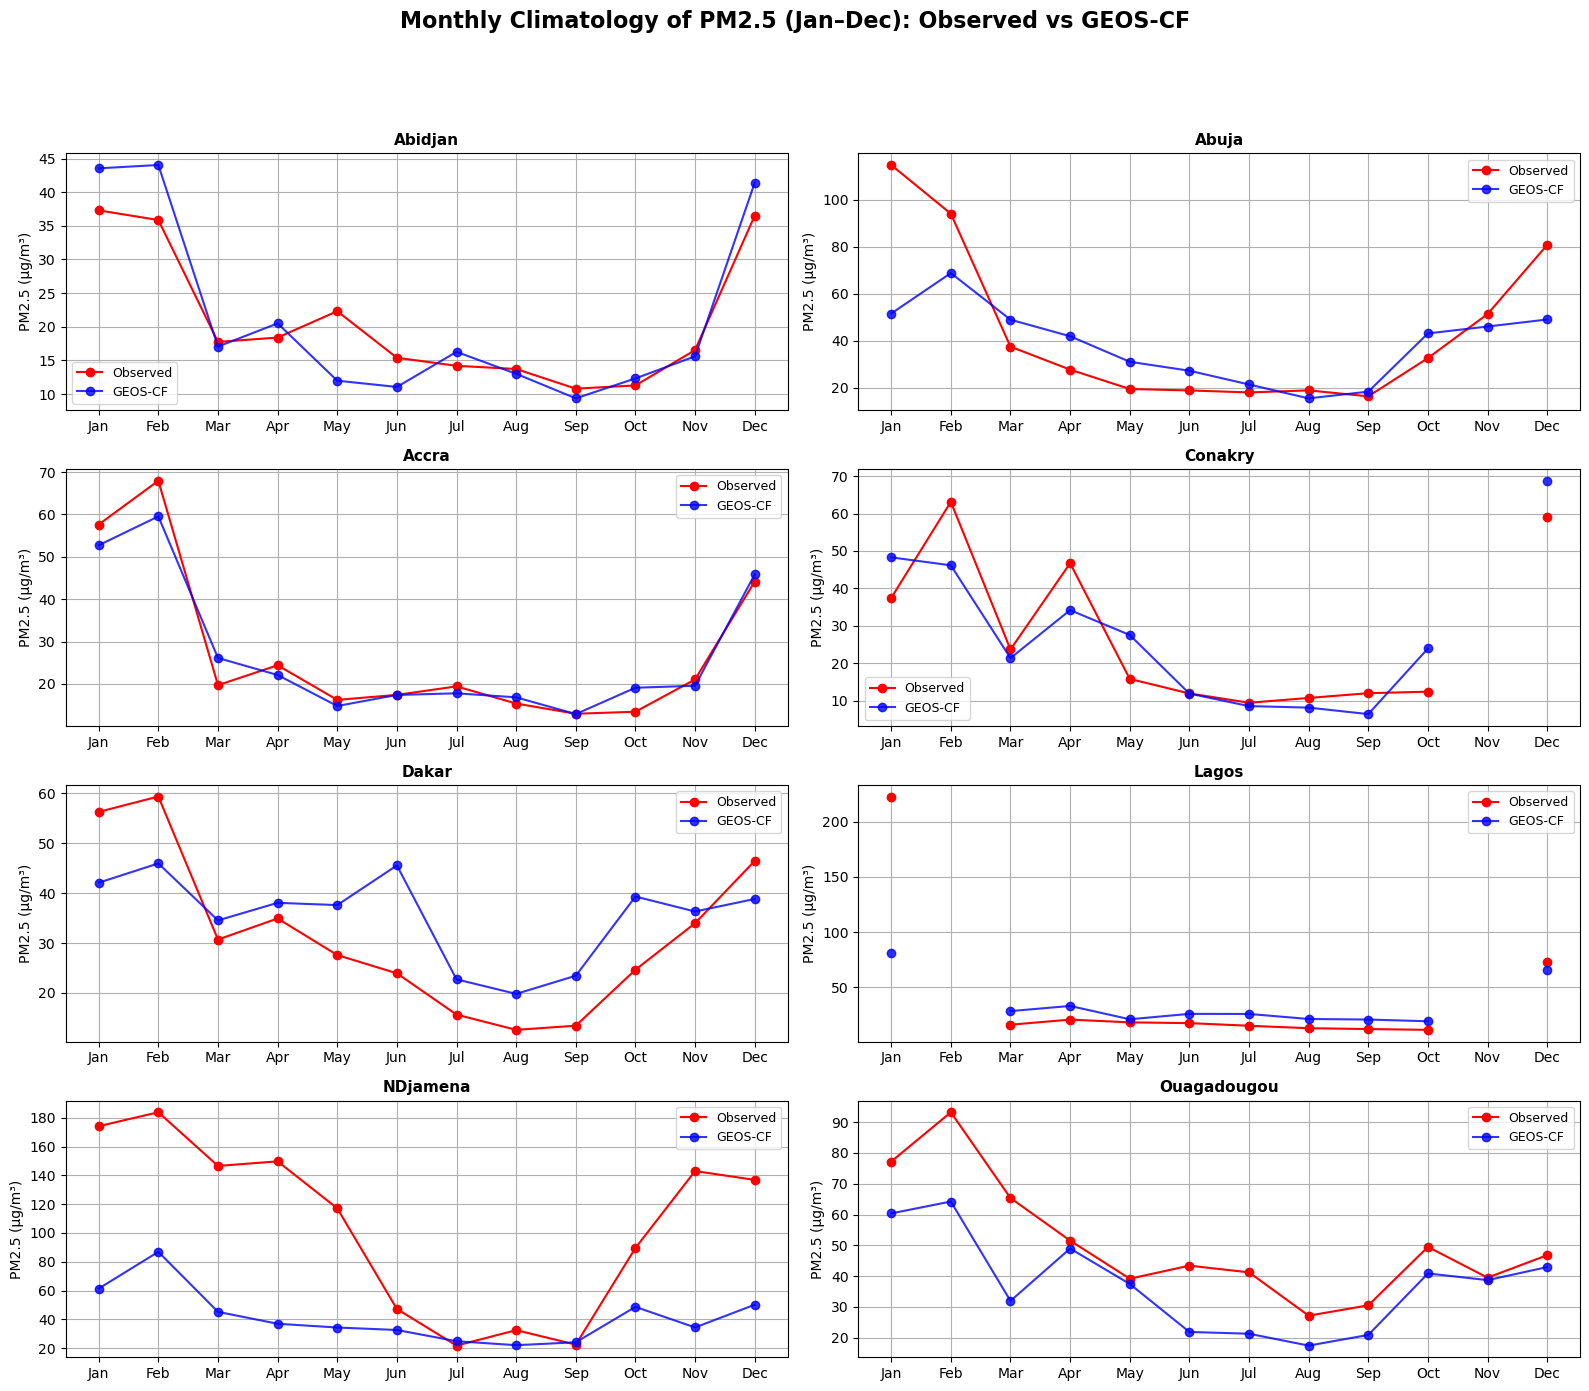

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# === Create subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False, sharey=False)
axs = axs.flatten()

# === Loop through cities ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and clean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])

    # Extract month
    df["Month"] = df["Datetime"].dt.month

    # Group by month number (1–12)
       # Group by month number (1–12), ensure all 12 months are present
    monthly_avg = df.groupby("Month")[["PM2.5", "PM2.5_GEOSCF"]].mean()
    monthly_avg = monthly_avg.reindex(range(1, 13))  # Add missing months as NaN


    # Plot
    ax = axs[i]
    ax.plot(month_labels, monthly_avg["PM2.5"], label="Observed", color="red", marker='o')
    ax.plot(month_labels, monthly_avg["PM2.5_GEOSCF"], label="GEOS-CF", color="blue", marker='o', alpha=0.8)
    ax.set_title(city, fontsize=11, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.grid(True)
    ax.legend(fontsize=9)

# === Final layout ===
fig.suptitle("Monthly Climatology of PM2.5 (Jan–Dec): Observed vs GEOS-CF", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


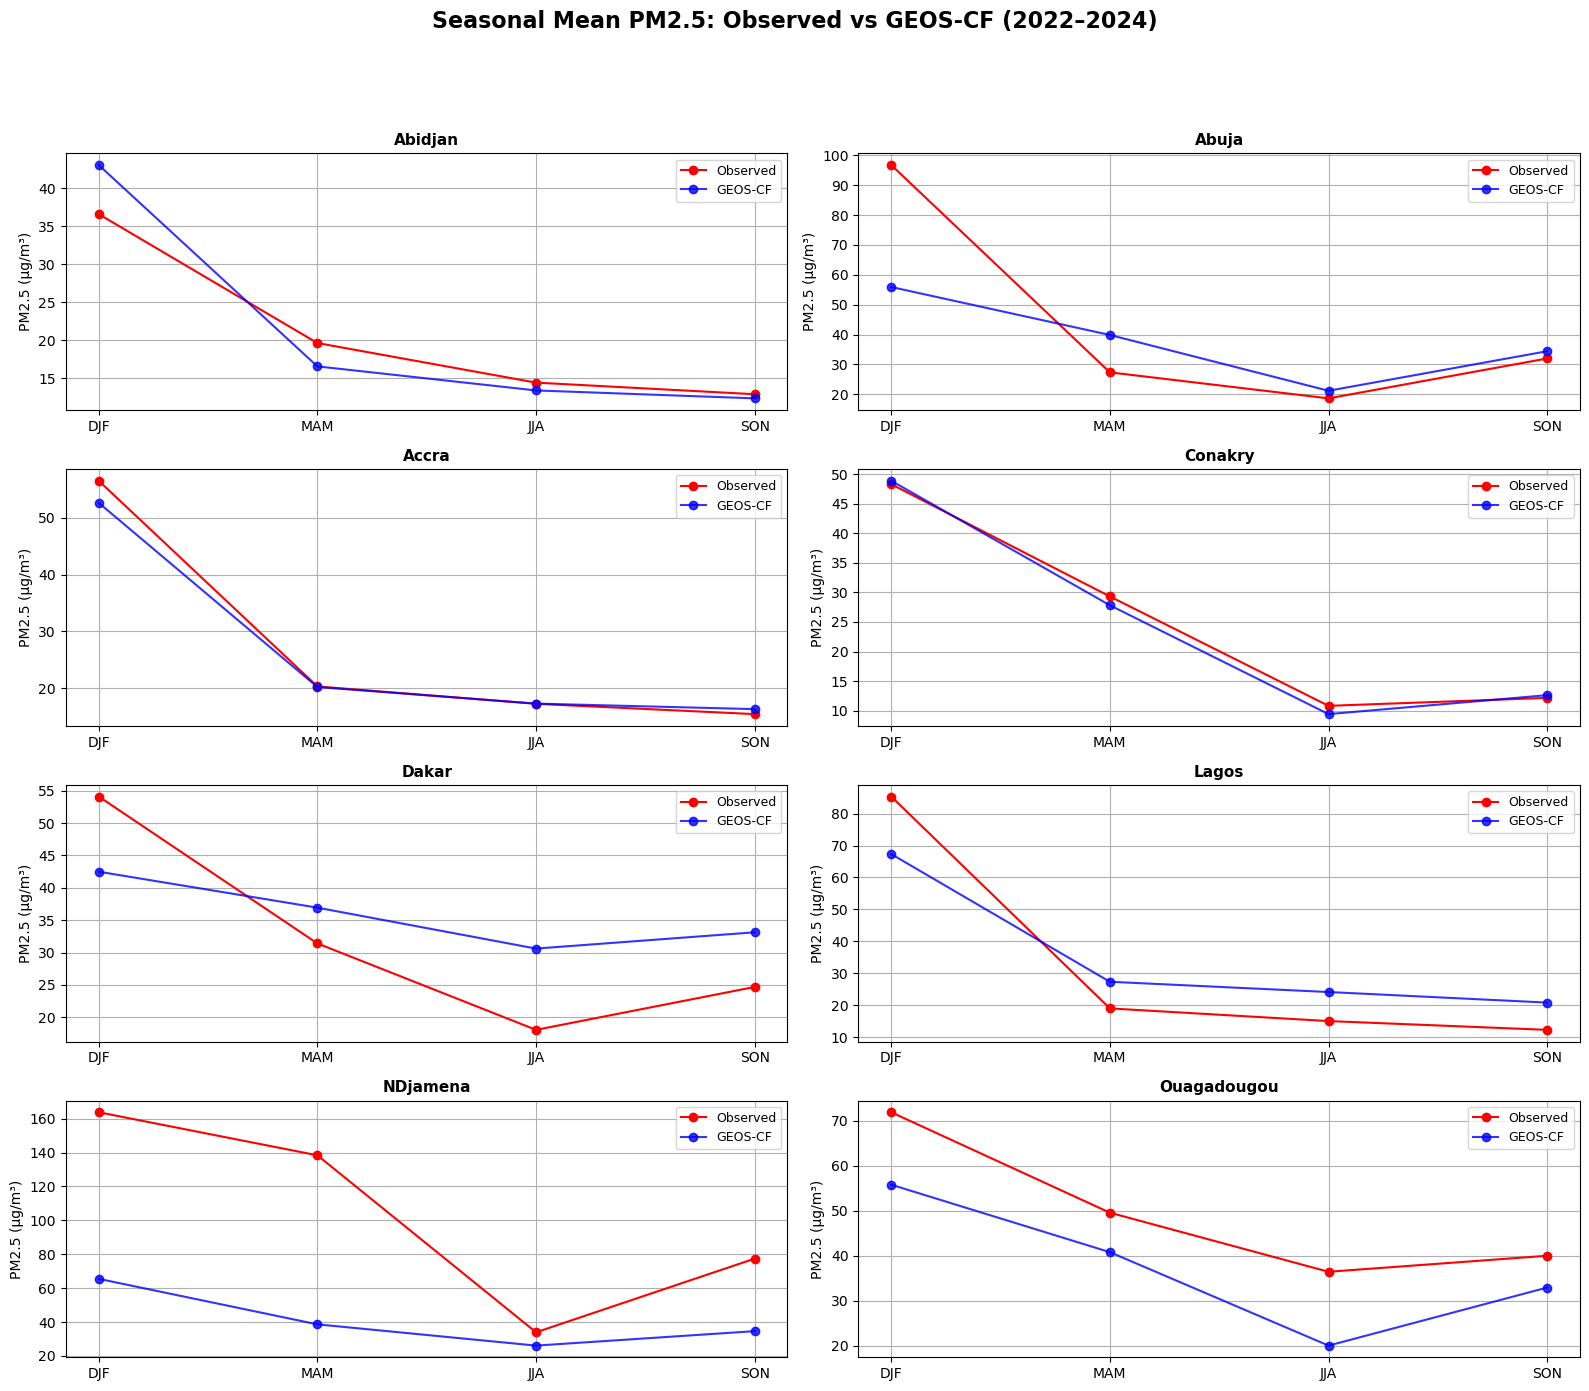

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Define seasons ===
season_map = {
    12: "DJF", 1: "DJF", 2: "DJF",
    3: "MAM", 4: "MAM", 5: "MAM",
    6: "JJA", 7: "JJA", 8: "JJA",
    9: "SON", 10: "SON", 11: "SON"
}
season_labels = ["DJF", "MAM", "JJA", "SON"]

# === Create subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False, sharey=False)
axs = axs.flatten()

# === Loop through cities ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and clean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])
    df["Season"] = df["Datetime"].dt.month.map(season_map)

    # Group by season
    seasonal_avg = df.groupby("Season")[["PM2.5", "PM2.5_GEOSCF"]].mean()
    seasonal_avg = seasonal_avg.reindex(season_labels)  # Ensure consistent order

    # Plot
    ax = axs[i]
    ax.plot(season_labels, seasonal_avg["PM2.5"], label="Observed", color="red", marker='o')
    ax.plot(season_labels, seasonal_avg["PM2.5_GEOSCF"], label="GEOS-CF", color="blue", marker='o', alpha=0.8)
    ax.set_title(city, fontsize=11, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.grid(True)
    ax.legend(fontsize=9)

# === Final layout ===
fig.suptitle("Seasonal Mean PM2.5: Observed vs GEOS-CF (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


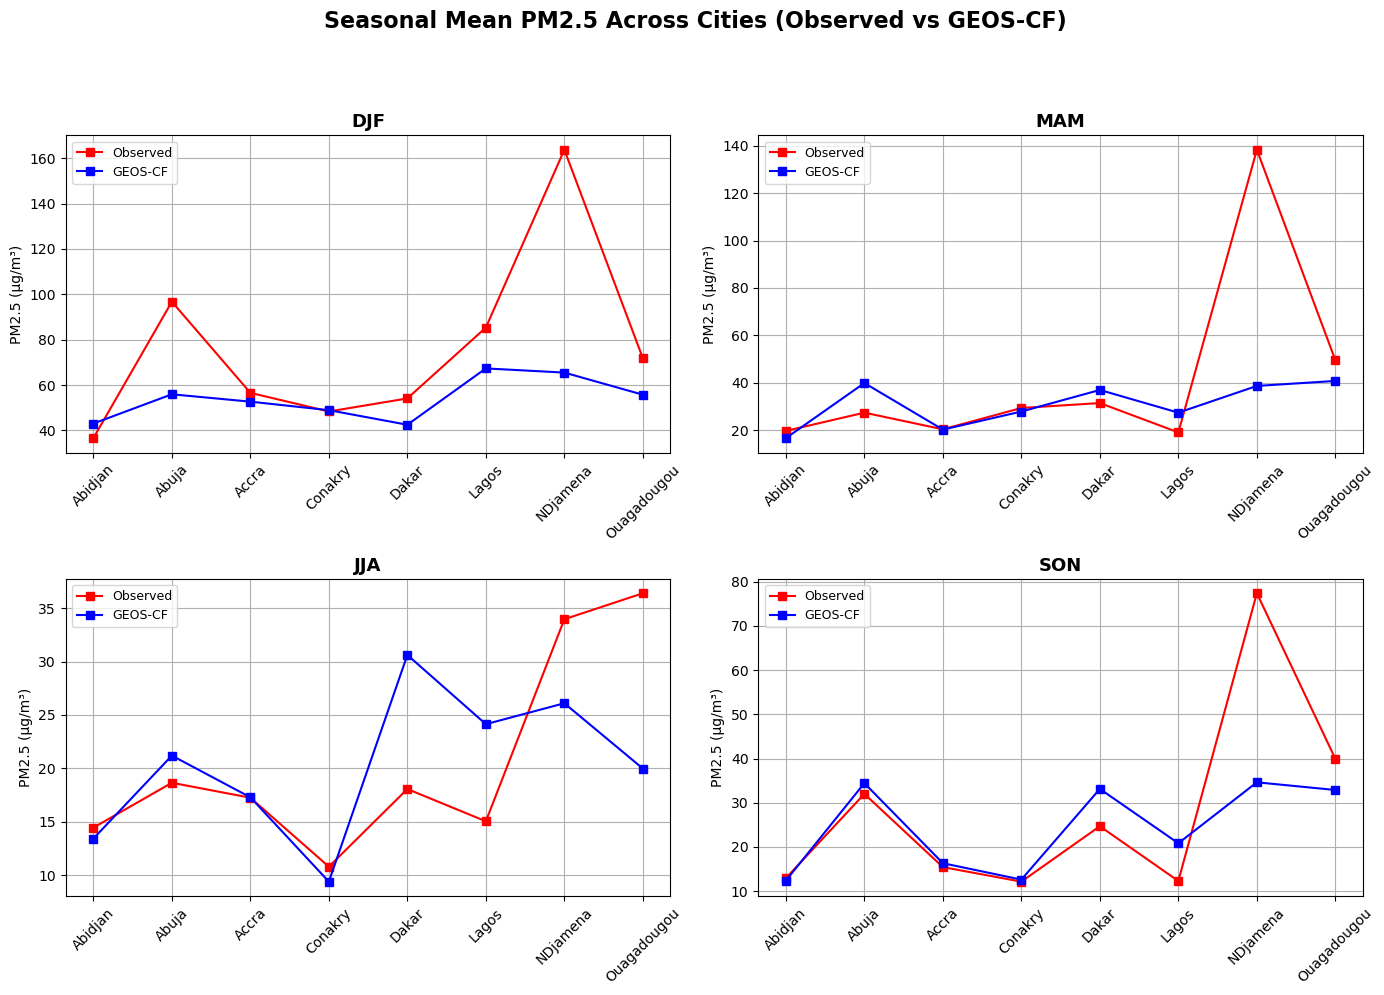

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Define seasons ===
season_map = {
    12: "DJF", 1: "DJF", 2: "DJF",
    3: "MAM", 4: "MAM", 5: "MAM",
    6: "JJA", 7: "JJA", 8: "JJA",
    9: "SON", 10: "SON", 11: "SON"
}
season_labels = ["DJF", "MAM", "JJA", "SON"]

# === Prepare container for results ===
seasonal_data = {season: {"Observed": {}, "GEOSCF": {}} for season in season_labels}

# === Loop through cities and gather seasonal data ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and prepare
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])
    df["Season"] = df["Datetime"].dt.month.map(season_map)

    # Group by season
    seasonal_avg = df.groupby("Season")[["PM2.5", "PM2.5_GEOSCF"]].mean()
    seasonal_avg = seasonal_avg.reindex(season_labels)

    for season in season_labels:
        seasonal_data[season]["Observed"][city] = seasonal_avg.loc[season, "PM2.5"]
        seasonal_data[season]["GEOSCF"][city] = seasonal_avg.loc[season, "PM2.5_GEOSCF"]

# === Plot ===
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=False, sharey=False)
axs = axs.flatten()

for i, season in enumerate(season_labels):
    ax = axs[i]
    cities_list = list(cities.keys())
    obs_vals = [seasonal_data[season]["Observed"].get(city, None) for city in cities_list]
    model_vals = [seasonal_data[season]["GEOSCF"].get(city, None) for city in cities_list]

    ax.plot(cities_list, obs_vals, label="Observed", color="red", marker='s', linestyle='-')
    ax.plot(cities_list, model_vals, label="GEOS-CF", color="blue", marker='s', linestyle='-')

    ax.set_title(f"{season}", fontsize=13, fontweight='bold')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend(fontsize=9)

# === Final Layout ===
fig.suptitle("Seasonal Mean PM2.5 Across Cities (Observed vs GEOS-CF)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


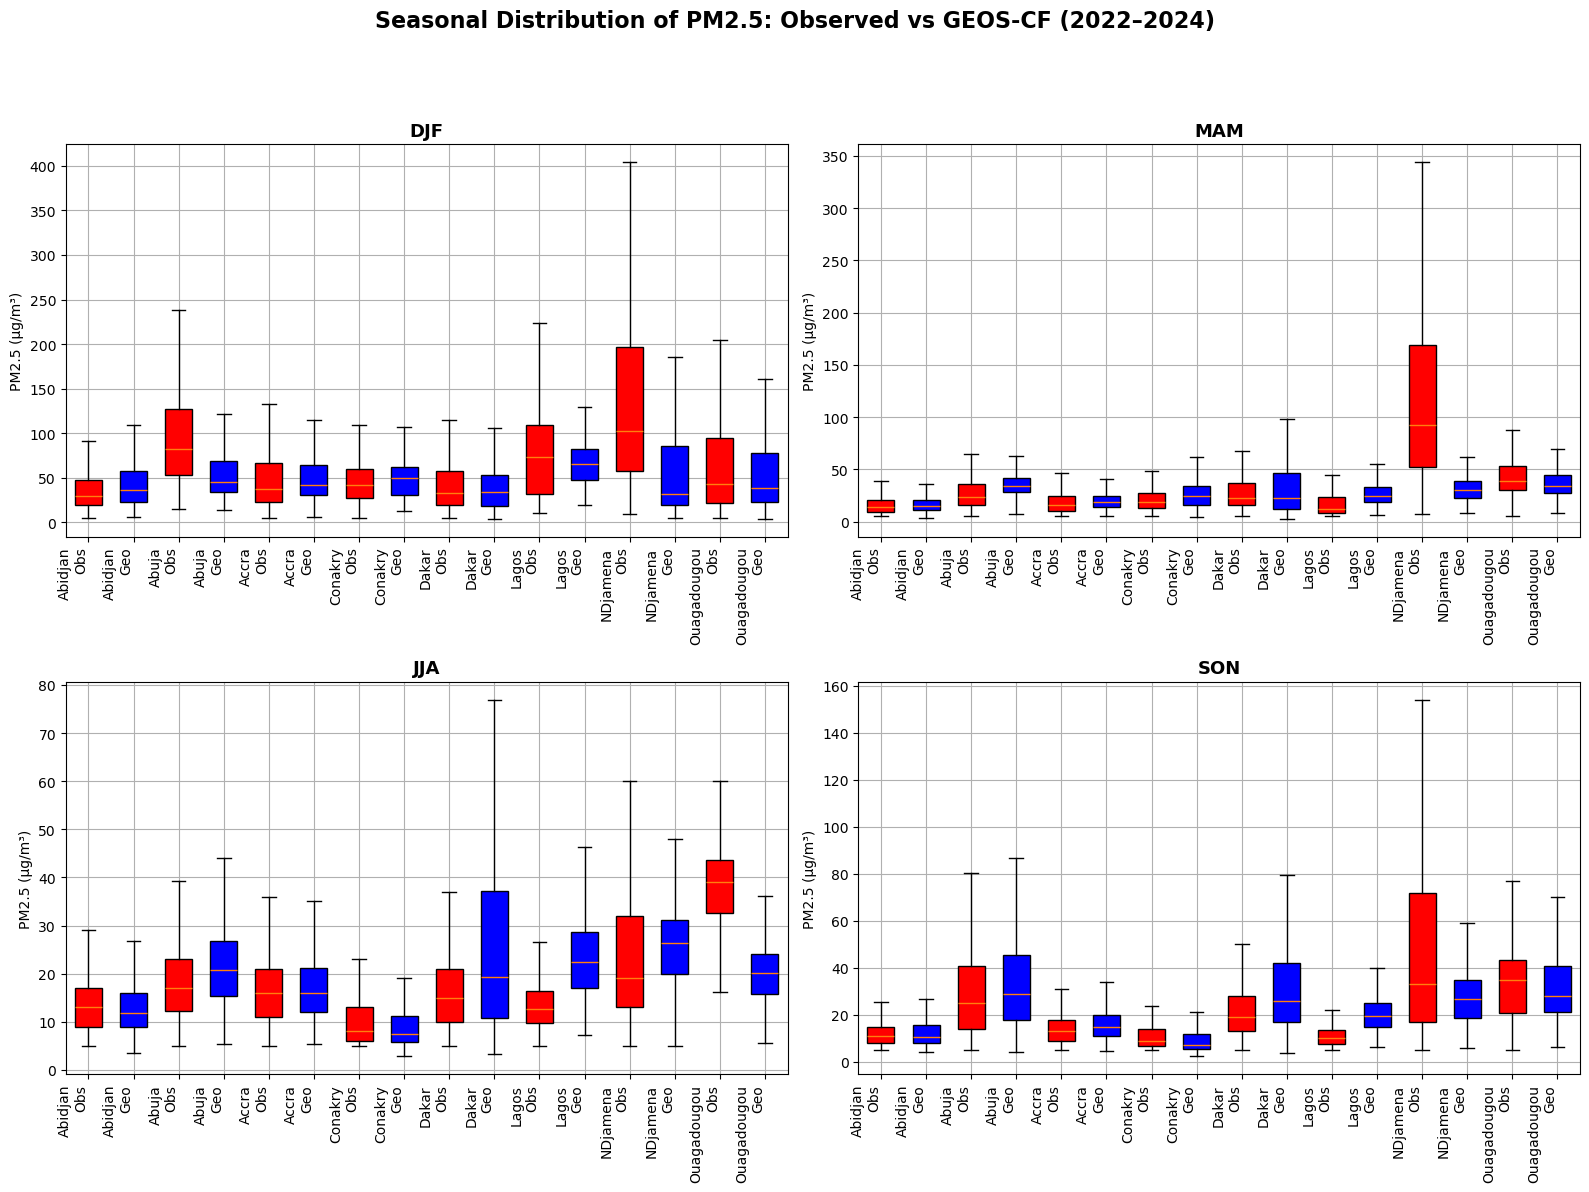

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Define seasons ===
season_map = {
    12: "DJF", 1: "DJF", 2: "DJF",
    3: "MAM", 4: "MAM", 5: "MAM",
    6: "JJA", 7: "JJA", 8: "JJA",
    9: "SON", 10: "SON", 11: "SON"
}
season_labels = ["DJF", "MAM", "JJA", "SON"]

# === Prepare seasonal data container ===
seasonal_data = {season: {"Observed": {}, "GEOSCF": {}} for season in season_labels}

# === Loop through cities and collect seasonal values ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])
    
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df = df.dropna(subset=["PM2.5", "PM2.5_GEOSCF"])
    df["Season"] = df["Datetime"].dt.month.map(season_map)
    
    for season in season_labels:
        df_season = df[df["Season"] == season]
        if not df_season.empty:
            seasonal_data[season]["Observed"][city] = df_season["PM2.5"].values
            seasonal_data[season]["GEOSCF"][city] = df_season["PM2.5_GEOSCF"].values

# === Plotting ===
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=False)
axs = axs.flatten()

for i, season in enumerate(season_labels):
    ax = axs[i]
    city_list = list(cities.keys())

    obs_data = [seasonal_data[season]["Observed"].get(city, []) for city in city_list]
    model_data = [seasonal_data[season]["GEOSCF"].get(city, []) for city in city_list]

    # Combine observed and modeled for side-by-side boxplots
    data = []
    positions = []
    labels = []

    for j, city in enumerate(city_list):
        obs_vals = obs_data[j]
        model_vals = model_data[j]

        if len(obs_vals) > 0:
            data.append(obs_vals)
            positions.append(j * 2)
            labels.append(f"{city}\nObs")

        if len(model_vals) > 0:
            data.append(model_vals)
            positions.append(j * 2 + 1)
            labels.append(f"{city}\nGeo")

    # Plot boxplots
    bplot = ax.boxplot(data, positions=positions, widths=0.6, patch_artist=True, showfliers=False)
    
    # Coloring
    for patch, label in zip(bplot['boxes'], labels):
        if "Obs" in label:
            patch.set_facecolor("red")
        else:
            patch.set_facecolor("blue")

    ax.set_title(f"{season}", fontsize=13, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=90, ha='right')
    ax.set_ylabel("PM2.5 (µg/m³)")
    ax.grid(True)

# === Final Touch ===
fig.suptitle("Seasonal Distribution of PM2.5: Observed vs GEOS-CF (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


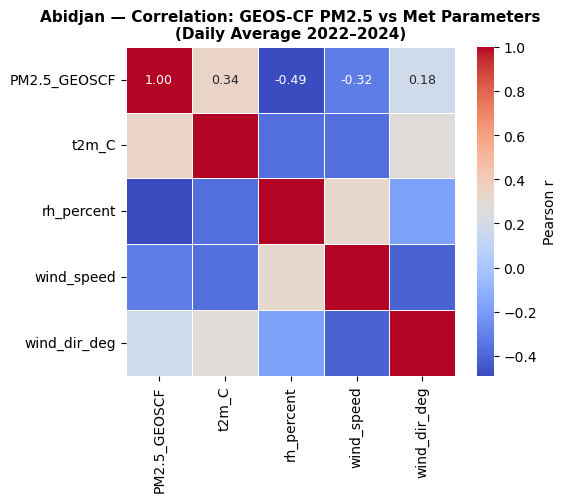

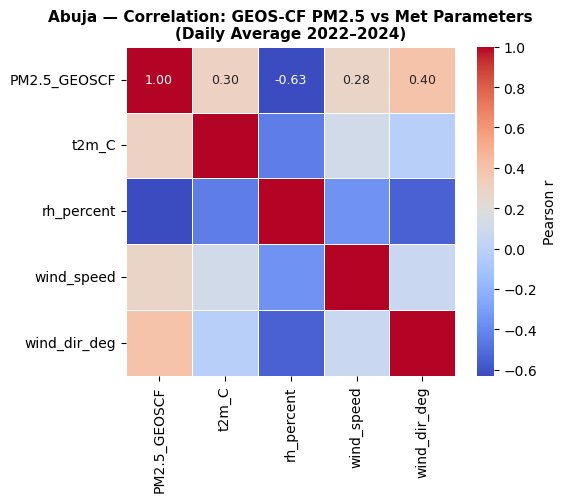

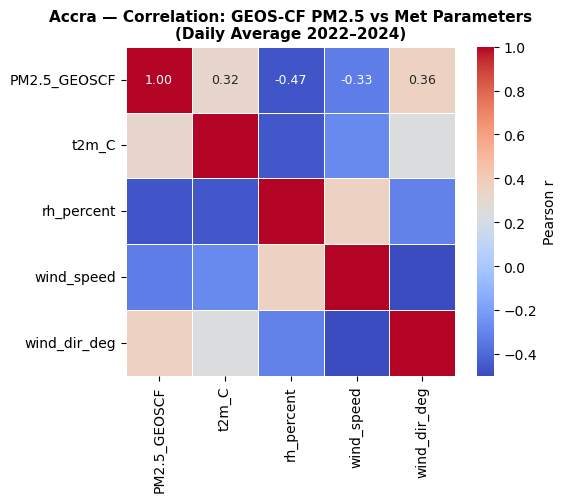

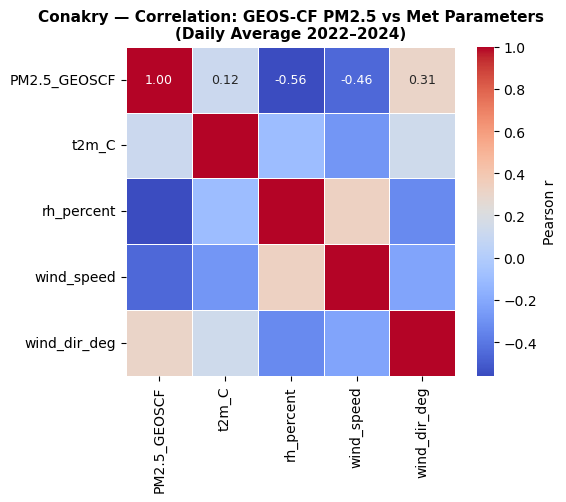

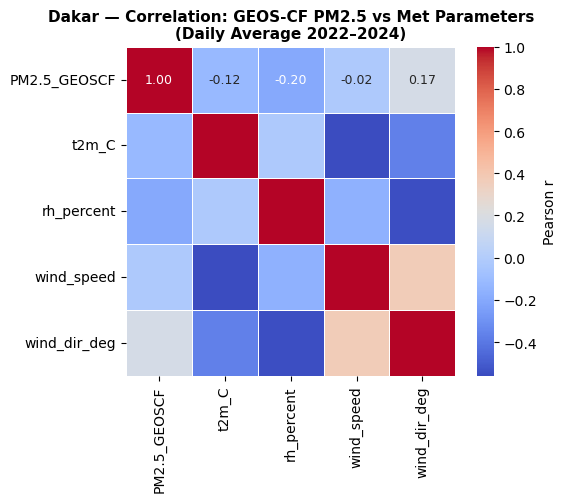

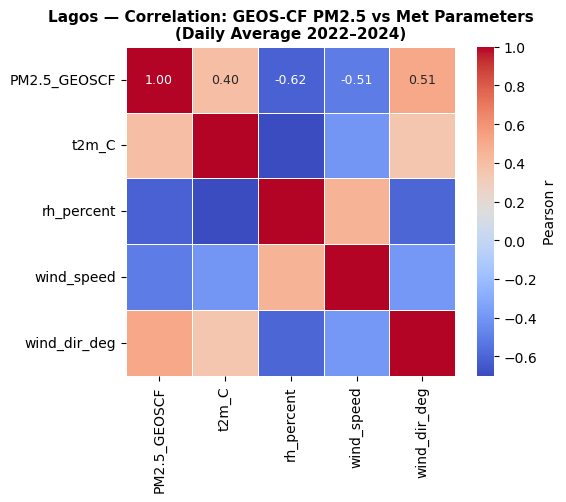

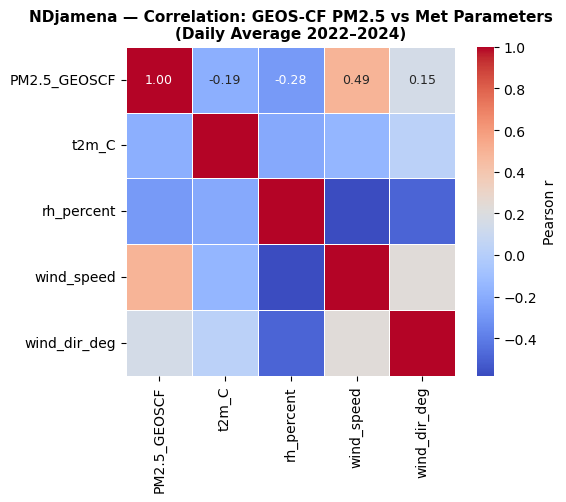

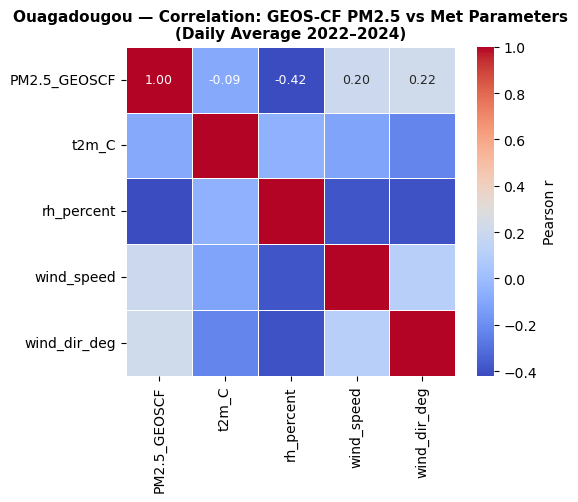

In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop through each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter date range and resample to daily mean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df_daily = df.set_index("Datetime")[["PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]]
    df_daily = df_daily.resample("D").mean().dropna()

    # Compute correlation
    corr = df_daily.corr().round(2)

    # === Plot ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True,
                cbar_kws={"label": "Pearson r"}, linewidths=0.5, annot_kws={"size": 9})

    plt.title(f"{city} — Correlation: GEOS-CF PM2.5 vs Met Parameters\n(Daily Average 2022–2024)", fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()


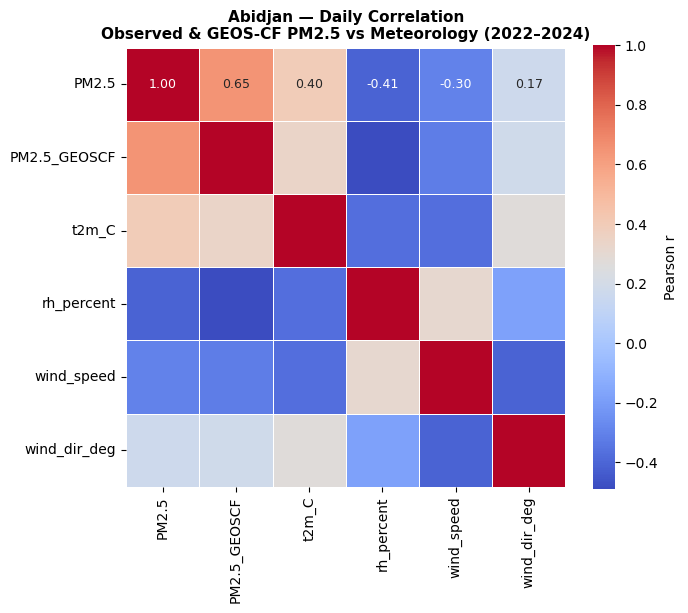

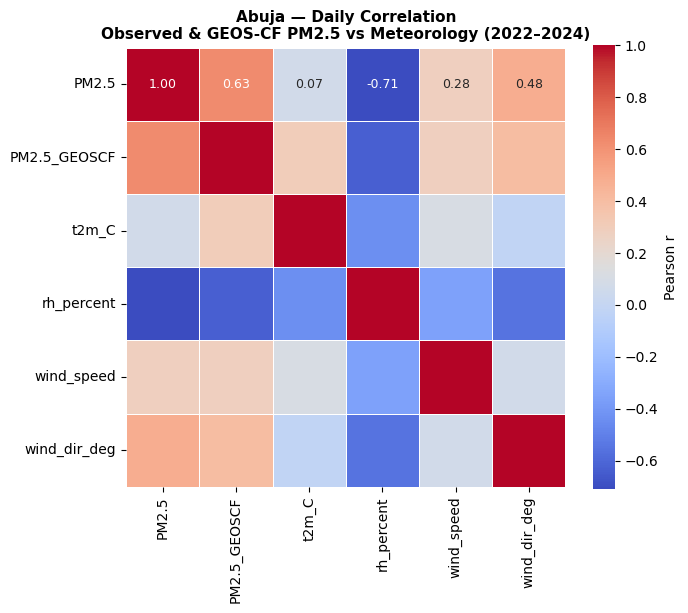

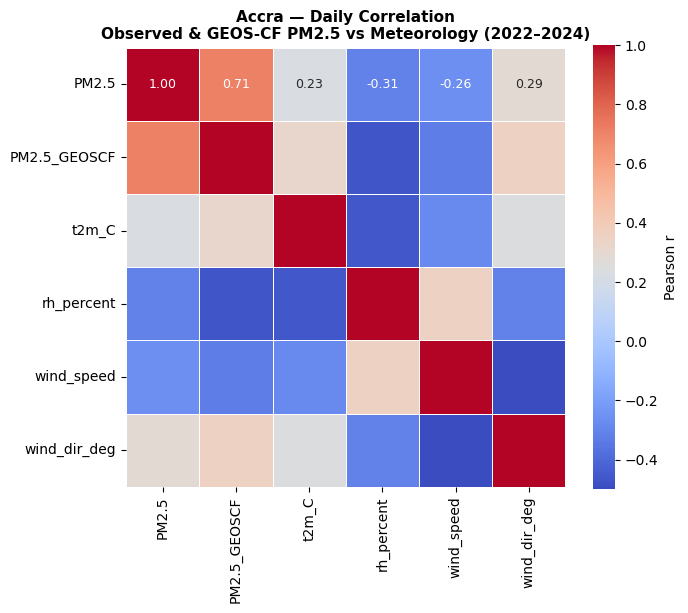

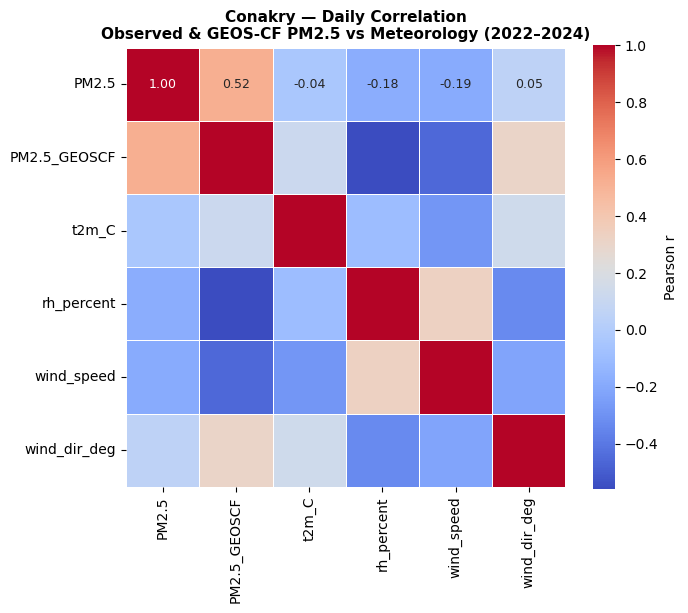

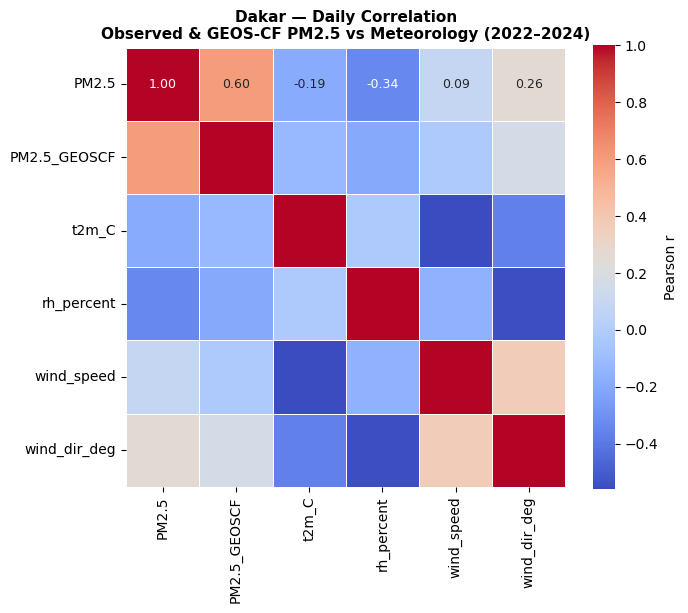

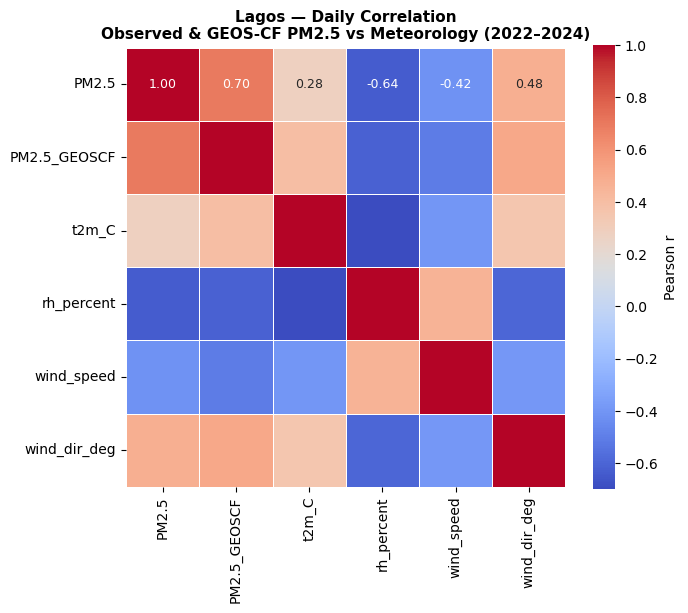

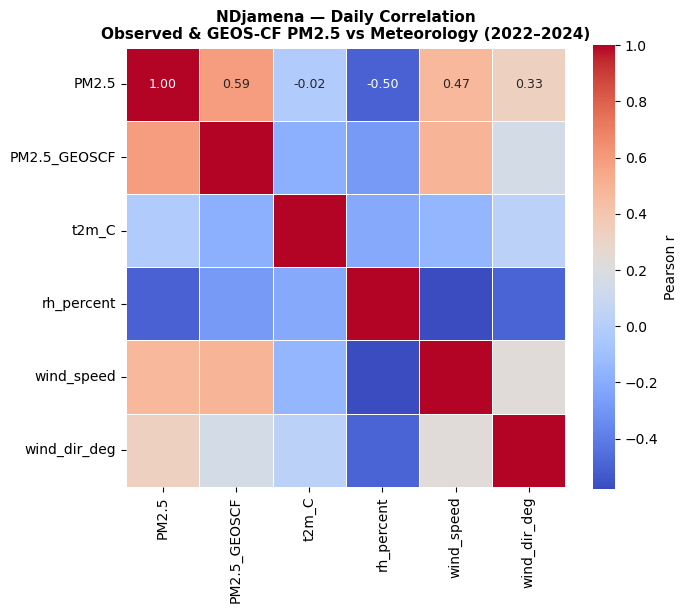

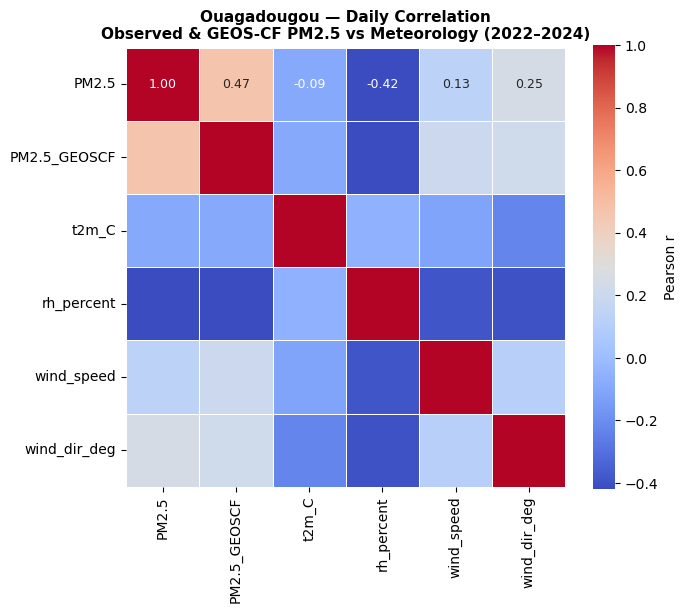

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop through each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter by date and resample to daily
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    # Select variables of interest
    columns = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[columns].resample("D").mean()

    # Drop any rows with NaNs
    df = df.dropna()

    # Double-check all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # Compute correlation
    corr = df.corr().round(2)

    # Plot full heatmap with annotations in every box
    plt.figure(figsize=(7, 6))
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        square=True,
        linewidths=0.5,
        annot_kws={"size": 9},
        cbar_kws={"label": "Pearson r"}
    )

    plt.title(f"{city} — Daily Correlation\nObserved & GEOS-CF PM2.5 vs Meteorology (2022–2024)",
              fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    # Add others if testing
}

for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Preprocessing
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    cols = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[cols].resample("D").mean().dropna()
    
    # Ensure all are floats
    df = df.astype(float)

    # Compute correlation safely
    corr = df.corr().astype(float).round(2)

    # Plot
    # Plot with safer layout
# === Plot heatmap and save to file instead of showing ===
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=False,
    linewidths=0.3,
    annot_kws={"size": 9},
    cbar_kws={"label": "Pearson r"}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title(f"{city} — Daily Correlation\nObserved & GEOS-CF PM2.5 vs Meteorology (2022–2024)",
          fontsize=11, fontweight='bold')
plt.tight_layout()

# Save instead of show
plt.savefig(f"{city}_correlation_heatmap.png")
plt.close()


In [7]:
print(f"\n📌 Correlation matrix for {city}:\n")
print(corr)



📌 Correlation matrix for Abidjan:

              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.65   0.40       -0.41       -0.30          0.17
PM2.5_GEOSCF   0.65          1.00   0.34       -0.49       -0.32          0.18
t2m_C          0.40          0.34   1.00       -0.37       -0.37          0.27
rh_percent    -0.41         -0.49  -0.37        1.00        0.31         -0.18
wind_speed    -0.30         -0.32  -0.37        0.31        1.00         -0.41
wind_dir_deg   0.17          0.18   0.27       -0.18       -0.41          1.00



📌 Correlation matrix for Abidjan:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.65   0.40       -0.41       -0.30          0.17
PM2.5_GEOSCF   0.65          1.00   0.34       -0.49       -0.32          0.18
t2m_C          0.40          0.34   1.00       -0.37       -0.37          0.27
rh_percent    -0.41         -0.49  -0.37        1.00        0.31         -0.18
wind_speed    -0.30         -0.32  -0.37        0.31        1.00         -0.41
wind_dir_deg   0.17          0.18   0.27       -0.18       -0.41          1.00


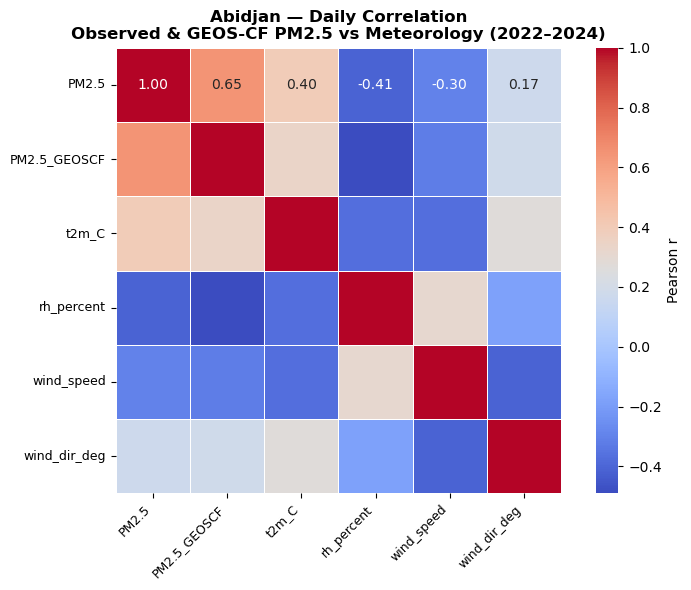


📌 Correlation matrix for Abuja:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.63   0.07       -0.71        0.28          0.48
PM2.5_GEOSCF   0.63          1.00   0.30       -0.63        0.28          0.40
t2m_C          0.07          0.30   1.00       -0.44        0.11         -0.02
rh_percent    -0.71         -0.63  -0.44        1.00       -0.35         -0.55
wind_speed     0.28          0.28   0.11       -0.35        1.00          0.07
wind_dir_deg   0.48          0.40  -0.02       -0.55        0.07          1.00


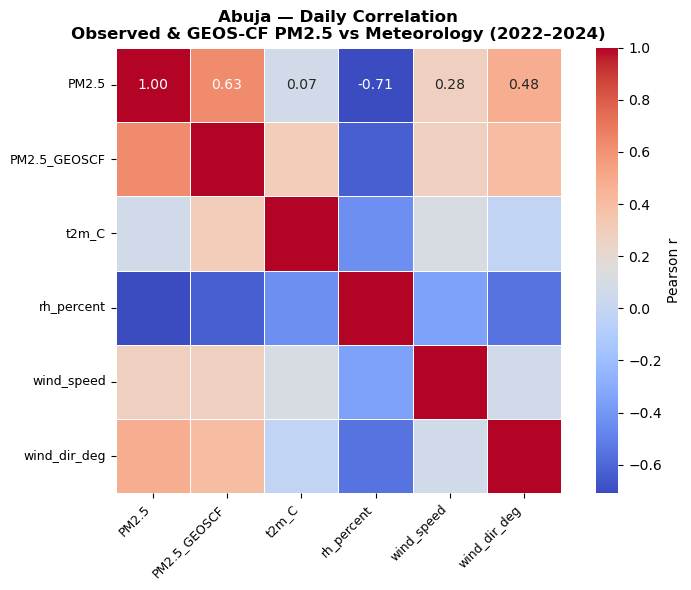


📌 Correlation matrix for Accra:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.71   0.23       -0.31       -0.26          0.29
PM2.5_GEOSCF   0.71          1.00   0.32       -0.47       -0.33          0.36
t2m_C          0.23          0.32   1.00       -0.46       -0.28          0.24
rh_percent    -0.31         -0.47  -0.46        1.00        0.36         -0.31
wind_speed    -0.26         -0.33  -0.28        0.36        1.00         -0.50
wind_dir_deg   0.29          0.36   0.24       -0.31       -0.50          1.00


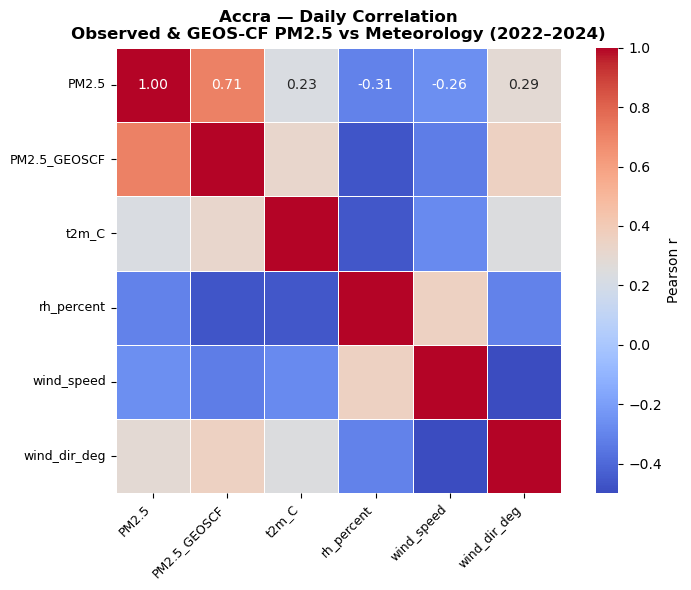


📌 Correlation matrix for Conakry:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.52  -0.04       -0.18       -0.19          0.05
PM2.5_GEOSCF   0.52          1.00   0.12       -0.56       -0.46          0.31
t2m_C         -0.04          0.12   1.00       -0.10       -0.28          0.14
rh_percent    -0.18         -0.56  -0.10        1.00        0.33         -0.33
wind_speed    -0.19         -0.46  -0.28        0.33        1.00         -0.22
wind_dir_deg   0.05          0.31   0.14       -0.33       -0.22          1.00


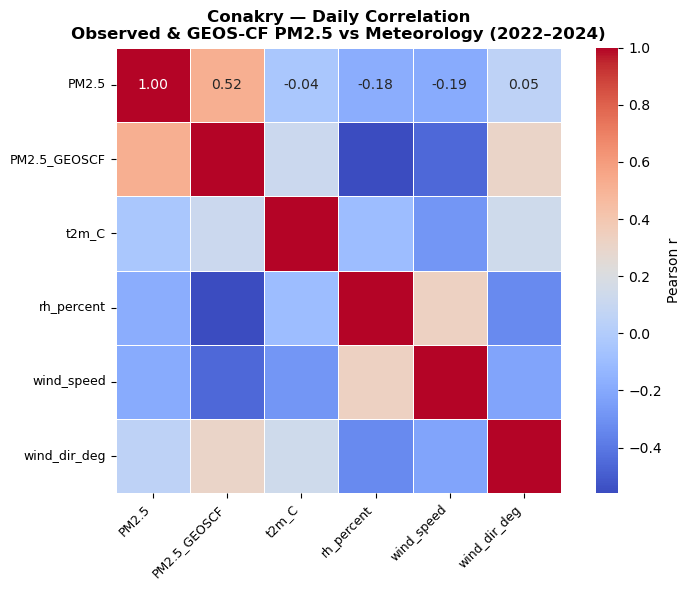


📌 Correlation matrix for Dakar:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.60  -0.19       -0.34        0.09          0.26
PM2.5_GEOSCF   0.60          1.00  -0.12       -0.20       -0.02          0.17
t2m_C         -0.19         -0.12   1.00       -0.02       -0.56         -0.37
rh_percent    -0.34         -0.20  -0.02        1.00       -0.16         -0.55
wind_speed     0.09         -0.02  -0.56       -0.16        1.00          0.37
wind_dir_deg   0.26          0.17  -0.37       -0.55        0.37          1.00


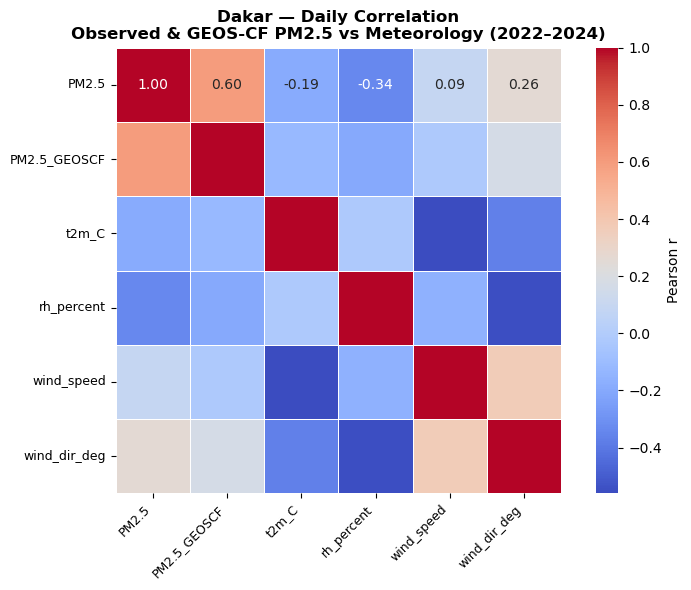


📌 Correlation matrix for Lagos:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.70   0.28       -0.64       -0.42          0.48
PM2.5_GEOSCF   0.70          1.00   0.40       -0.62       -0.51          0.51
t2m_C          0.28          0.40   1.00       -0.70       -0.40          0.35
rh_percent    -0.64         -0.62  -0.70        1.00        0.46         -0.60
wind_speed    -0.42         -0.51  -0.40        0.46        1.00         -0.39
wind_dir_deg   0.48          0.51   0.35       -0.60       -0.39          1.00


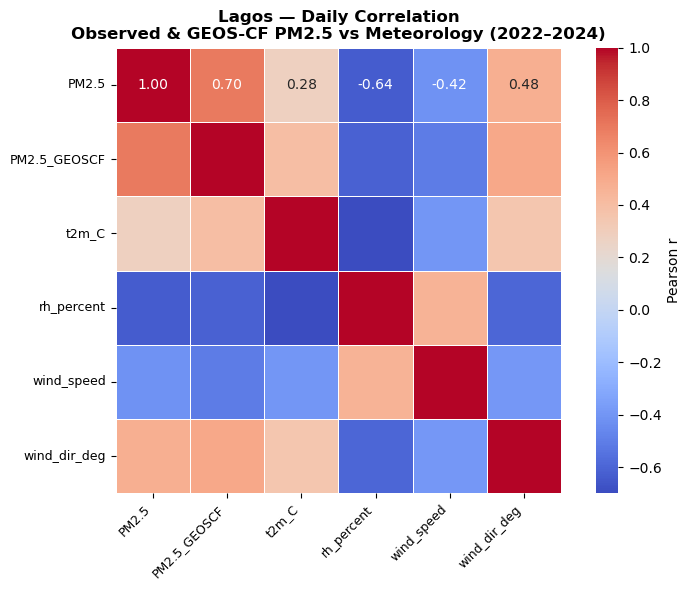


📌 Correlation matrix for NDjamena:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.59  -0.02       -0.50        0.47          0.33
PM2.5_GEOSCF   0.59          1.00  -0.19       -0.28        0.49          0.15
t2m_C         -0.02         -0.19   1.00       -0.21       -0.15          0.03
rh_percent    -0.50         -0.28  -0.21        1.00       -0.58         -0.49
wind_speed     0.47          0.49  -0.15       -0.58        1.00          0.23
wind_dir_deg   0.33          0.15   0.03       -0.49        0.23          1.00


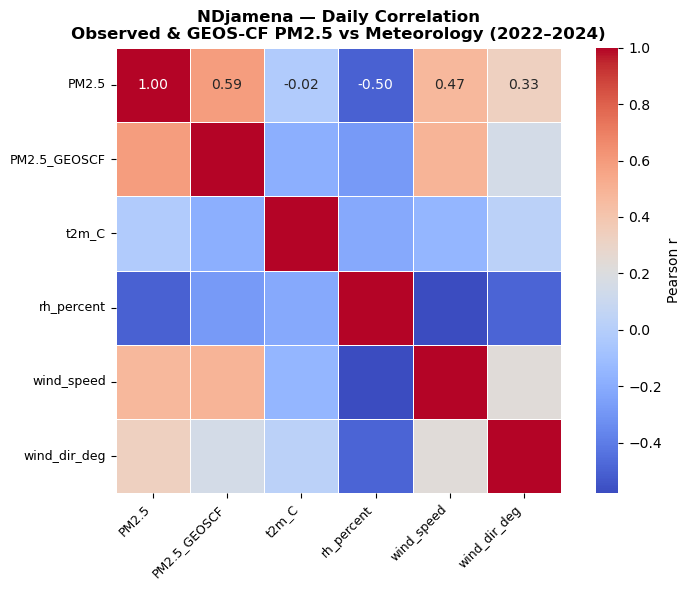


📌 Correlation matrix for Ouagadougou:
              PM2.5  PM2.5_GEOSCF  t2m_C  rh_percent  wind_speed  wind_dir_deg
PM2.5          1.00          0.47  -0.09       -0.42        0.13          0.25
PM2.5_GEOSCF   0.47          1.00  -0.09       -0.42        0.20          0.22
t2m_C         -0.09         -0.09   1.00       -0.05       -0.11         -0.23
rh_percent    -0.42         -0.42  -0.05        1.00       -0.39         -0.40
wind_speed     0.13          0.20  -0.11       -0.39        1.00          0.11
wind_dir_deg   0.25          0.22  -0.23       -0.40        0.11          1.00


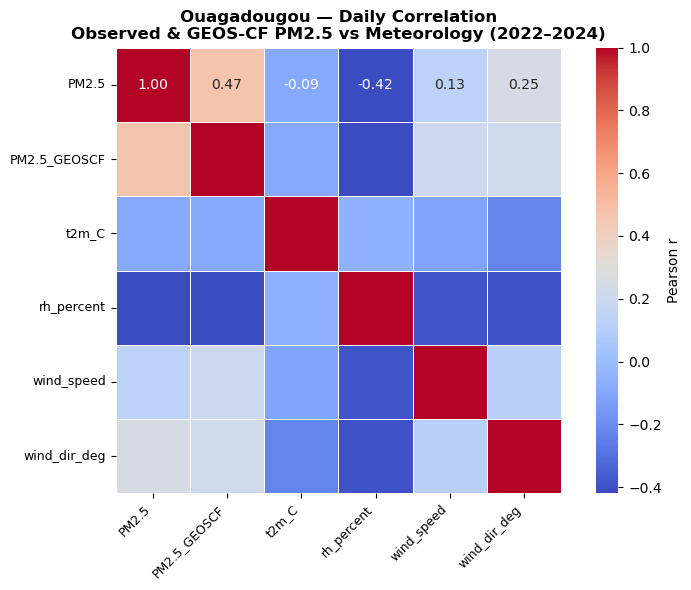

In [8]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and prepare
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    # Choose only relevant columns
    columns_of_interest = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[columns_of_interest].resample("D").mean().dropna()

    # Correlation
    corr = df.corr().round(2)
    print(f"\n📌 Correlation matrix for {city}:\n{corr}")

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        square=True,
        linewidths=0.5,
        annot_kws={"size": 10},
        cbar_kws={"label": "Pearson r"}
    )
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.title(f"{city} — Daily Correlation\nObserved & GEOS-CF PM2.5 vs Meteorology (2022–2024)",
              fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


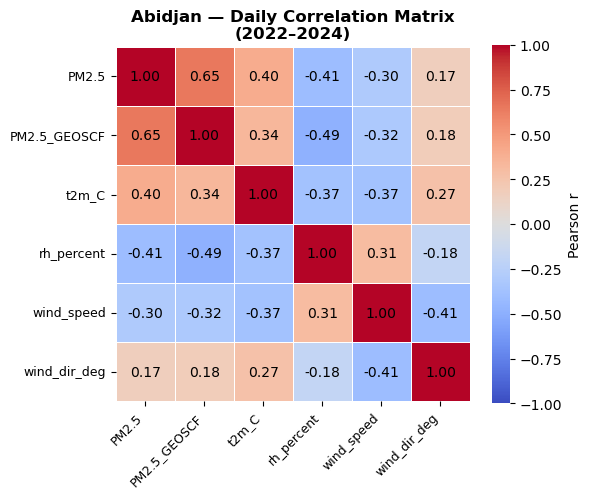

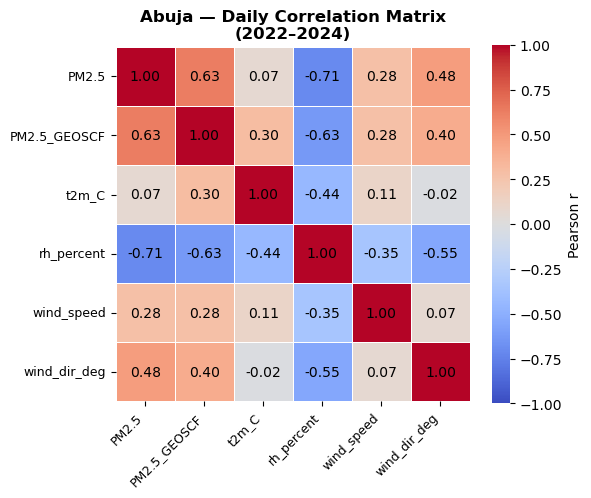

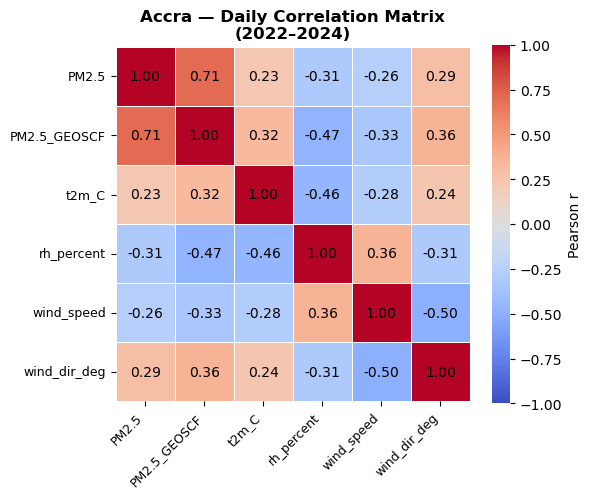

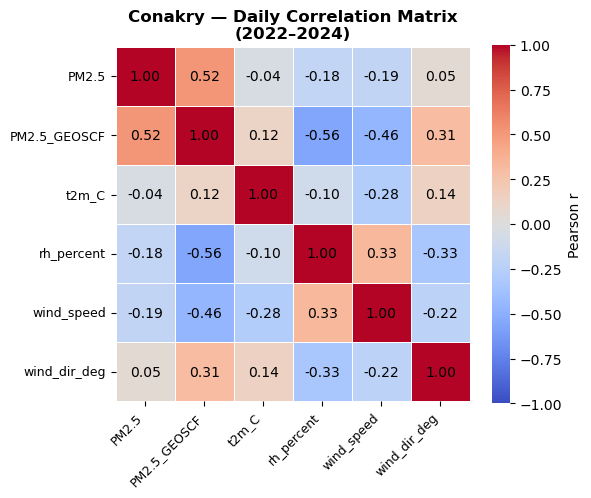

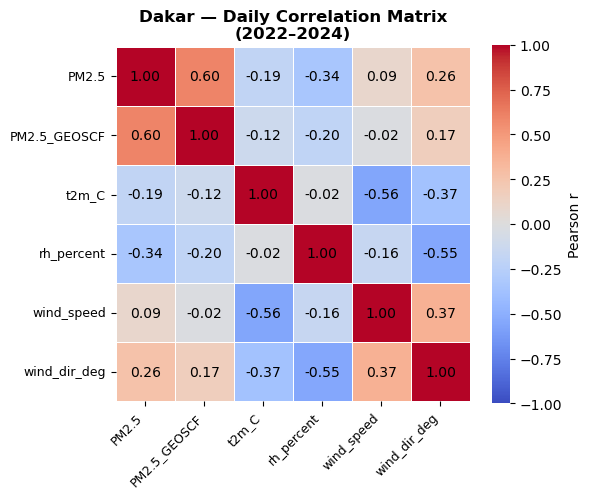

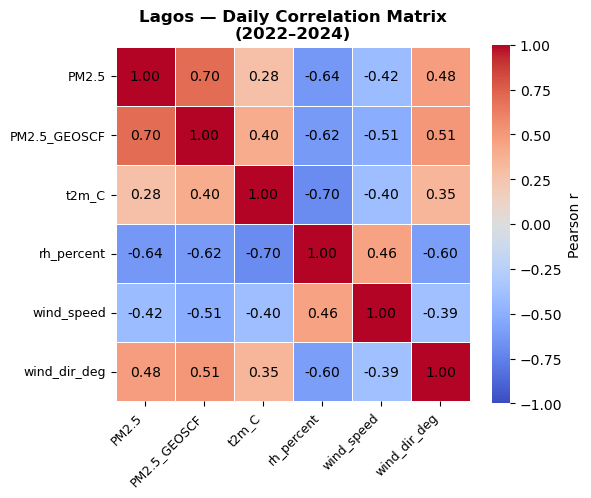

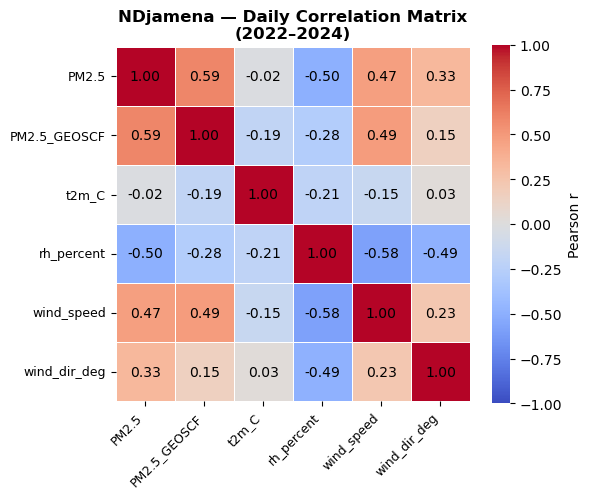

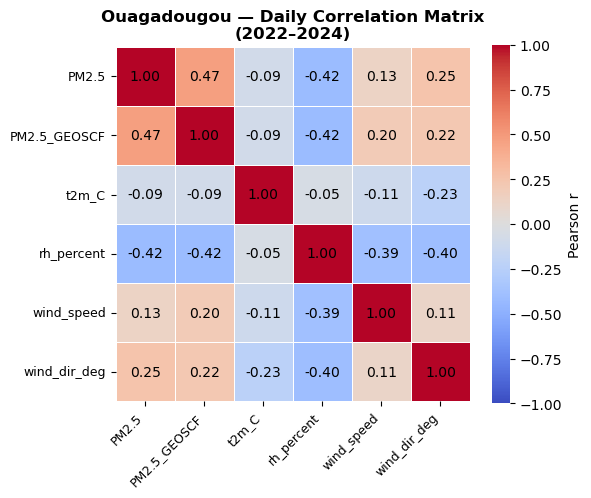

In [11]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])
    
    # Filter and resample
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    columns = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[columns].resample("D").mean().dropna()

    corr = df.corr().round(2)

    # === Plot heatmap ===
    plt.figure(figsize=(6, 5))
    ax = sns.heatmap(
        corr,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        square=True,
        cbar_kws={"label": "Pearson r"},
        linewidths=0.5
    )

    # Manual annotation fix
    for i in range(len(corr)):
        for j in range(len(corr)):
            value = corr.iloc[i, j]
            ax.text(j + 0.5, i + 0.5, f"{value:.2f}",
                    ha='center', va='center', color='black', fontsize=10)

    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.title(f"{city} — Daily Correlation Matrix\n(2022–2024)", fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


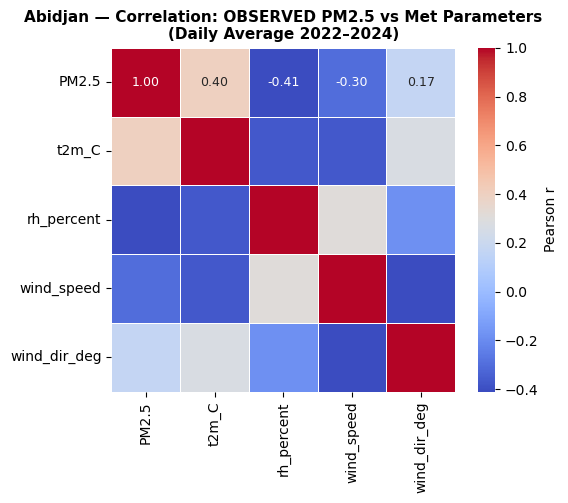

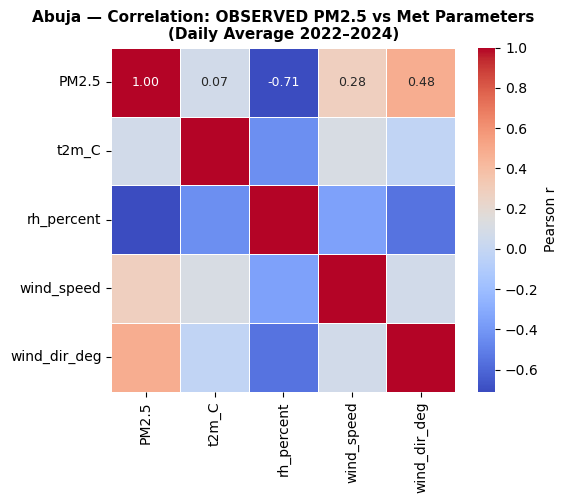

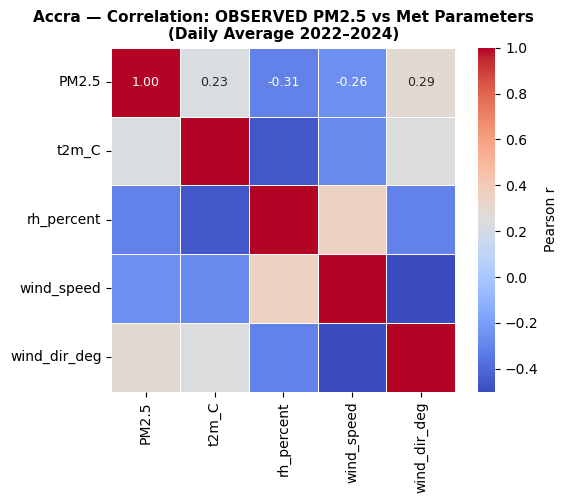

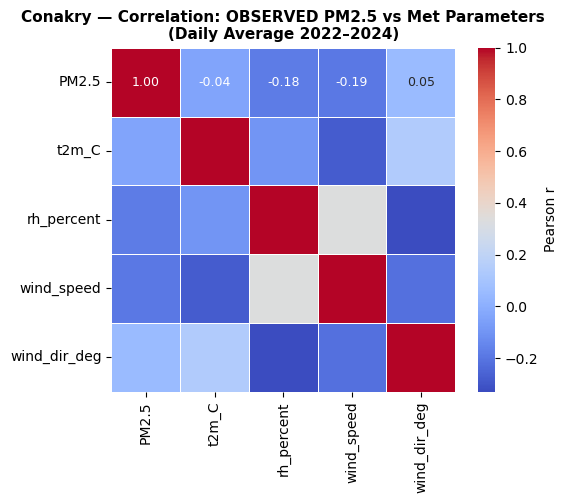

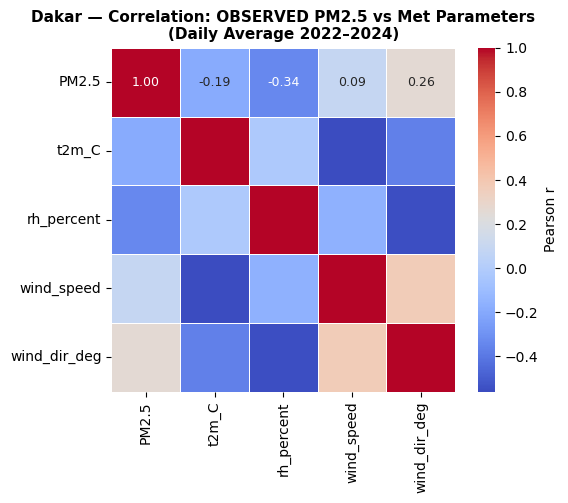

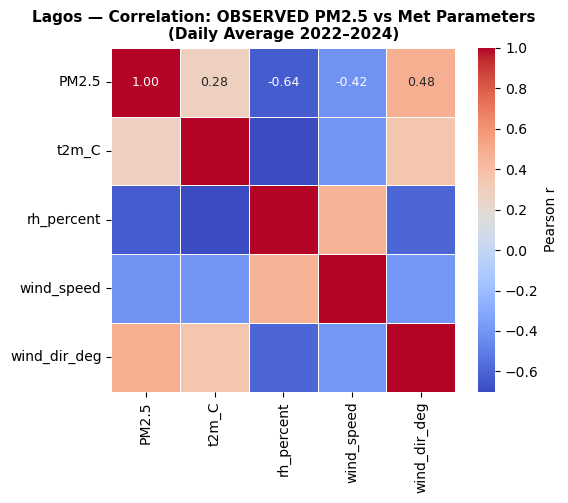

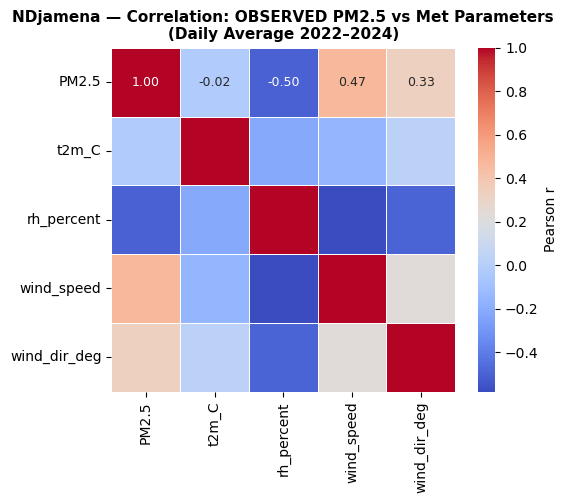

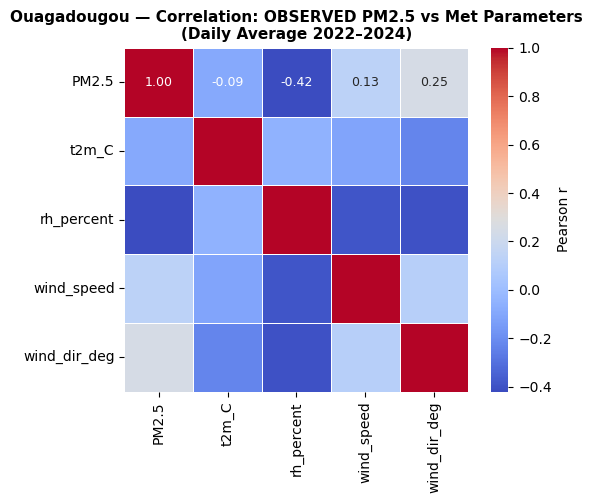

In [24]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop through each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter date range and resample to daily mean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df_daily = df.set_index("Datetime")[["PM2.5", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]]
    df_daily = df_daily.resample("D").mean().dropna()

    # Compute correlation
    corr = df_daily.corr().round(2)

    # === Plot ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True,
                cbar_kws={"label": "Pearson r"}, linewidths=0.5, annot_kws={"size": 9})

    plt.title(f"{city} — Correlation: OBSERVED PM2.5 vs Met Parameters\n(Daily Average 2022–2024)", fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()


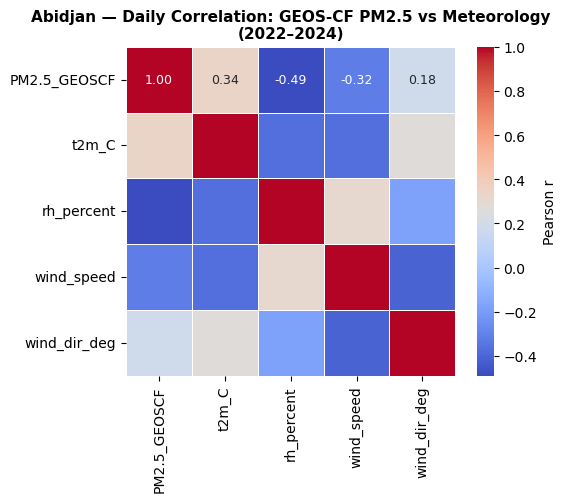

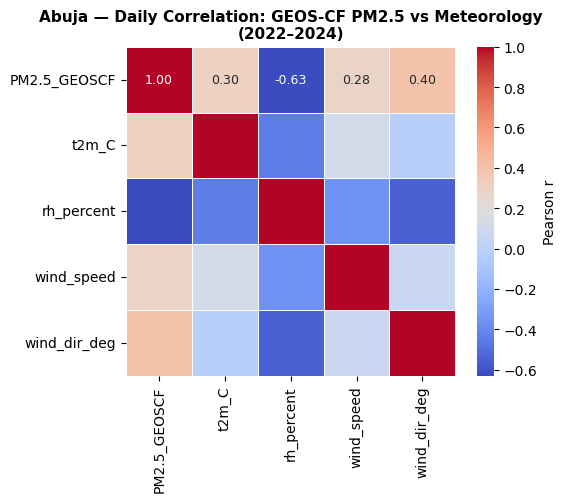

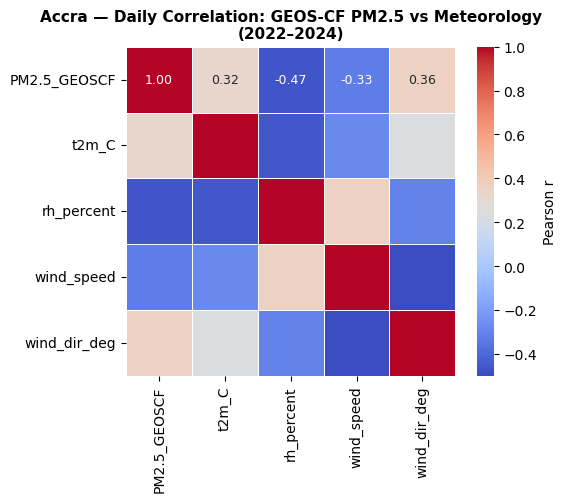

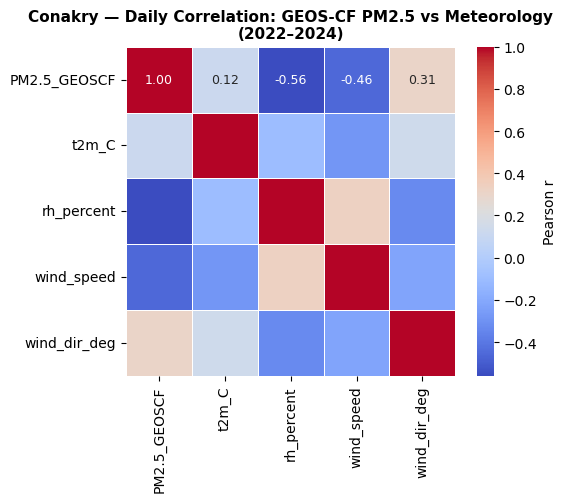

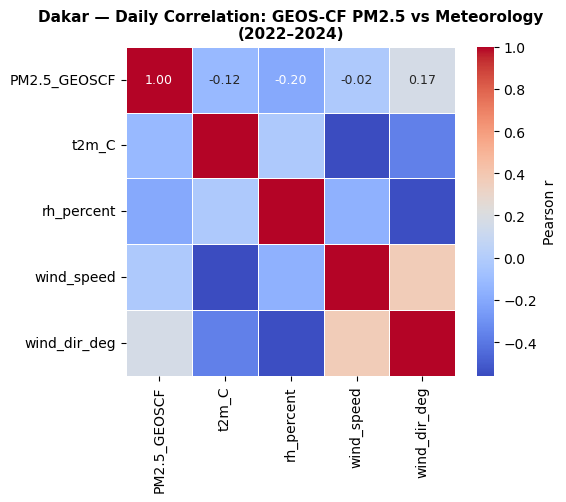

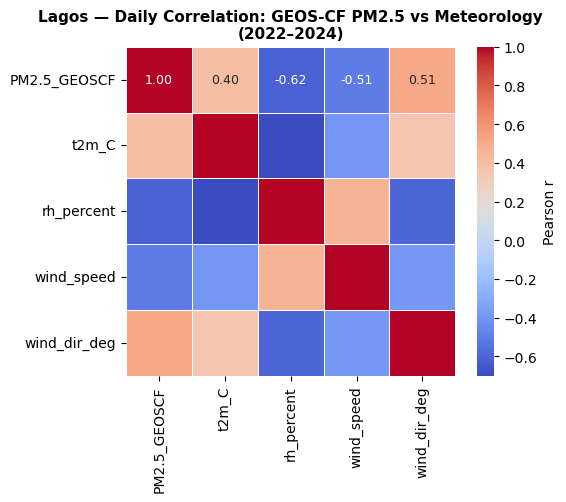

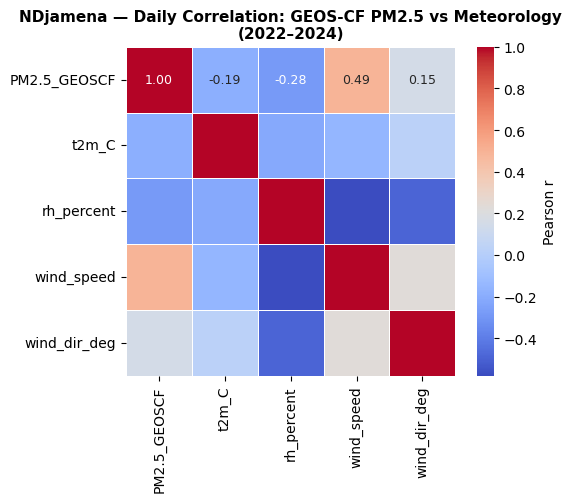

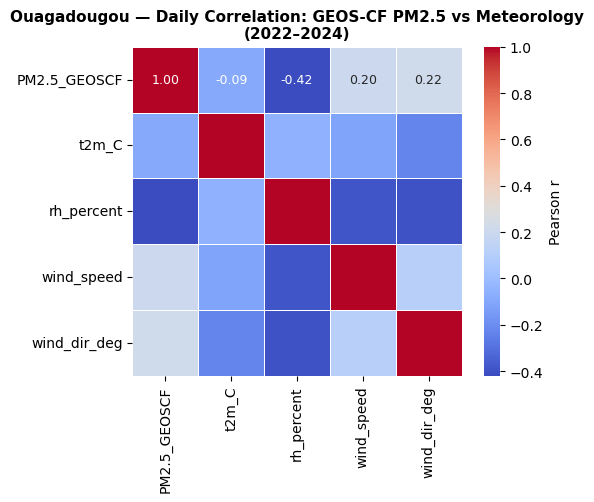

In [23]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop through each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and resample
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    # Select only numeric columns for correlation
    columns_of_interest = ["PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[columns_of_interest].copy()
    df = df.resample("D").mean()

    # Drop rows with any NaNs
    df = df.dropna()

    # Compute full correlation matrix
    corr = df.corr().round(2)

    # === Plot heatmap ===
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True,
                linewidths=0.5, cbar_kws={"label": "Pearson r"}, annot_kws={"size": 9})

    plt.title(f"{city} — Daily Correlation: GEOS-CF PM2.5 vs Meteorology\n(2022–2024)", fontsize=11, fontweight='bold')
    plt.tight_layout()
    plt.show()


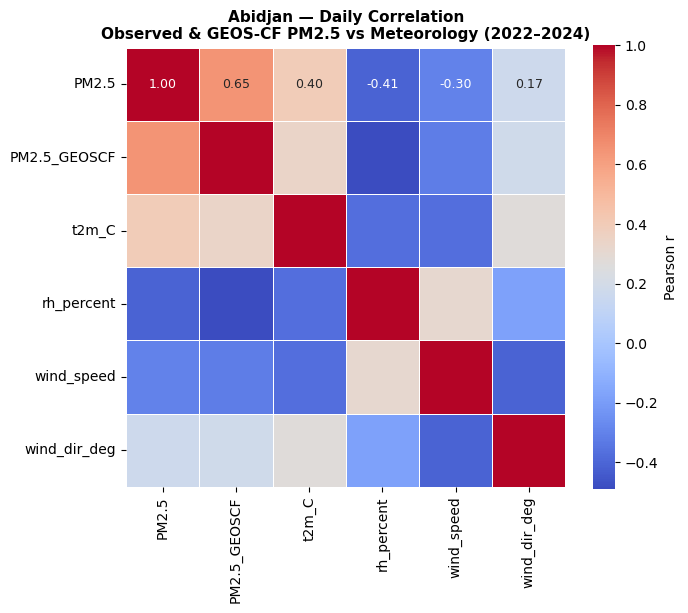

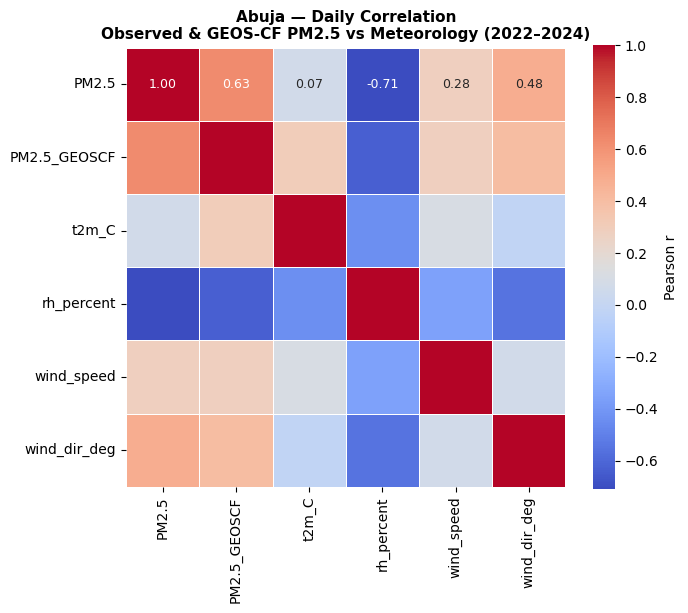

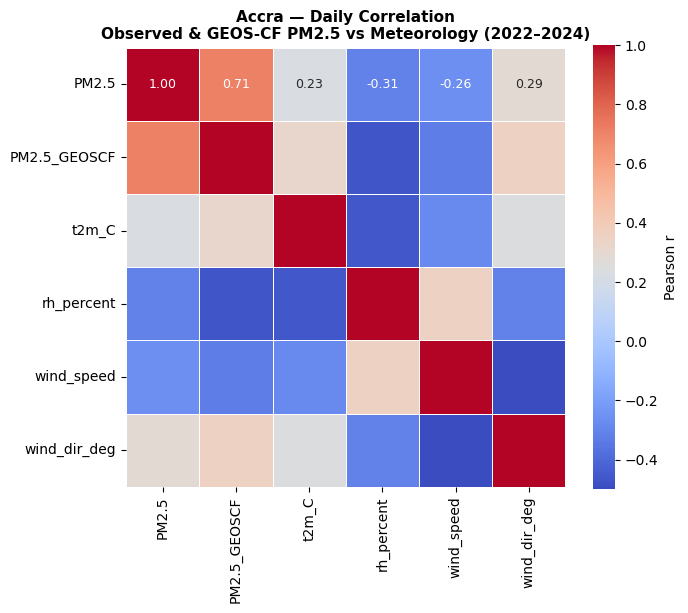

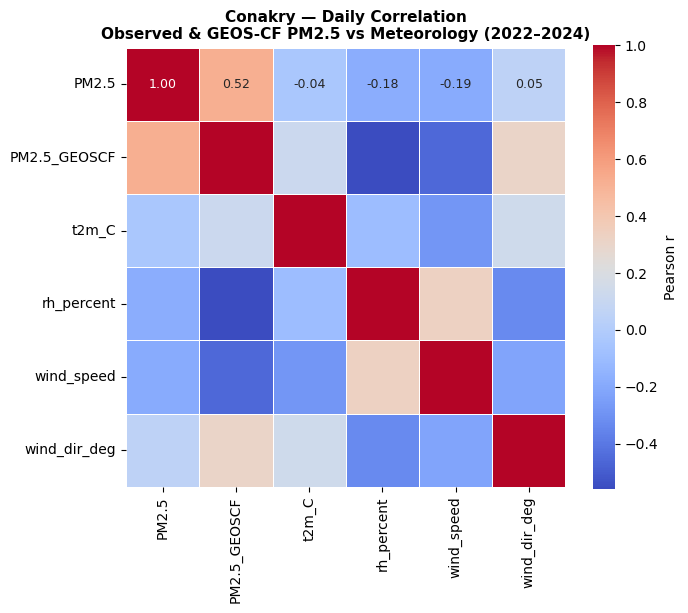

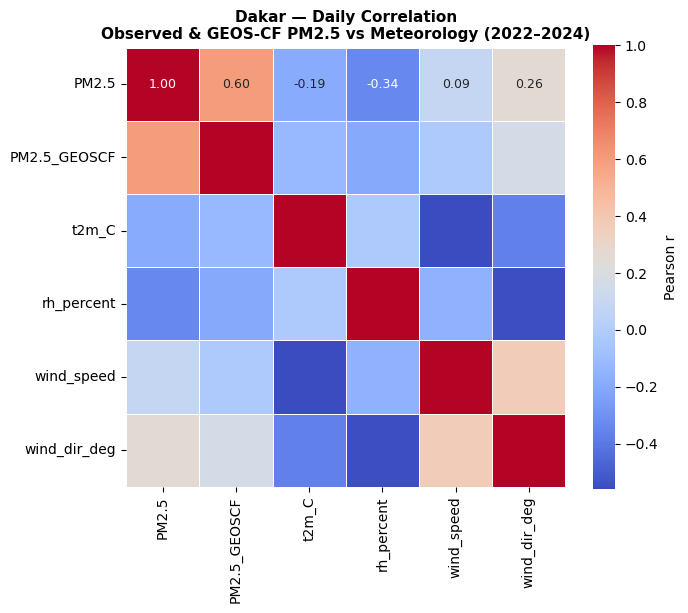

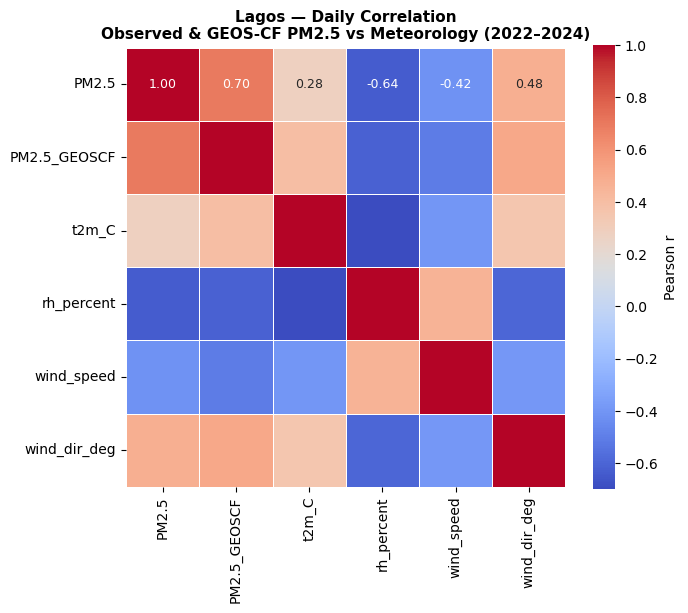

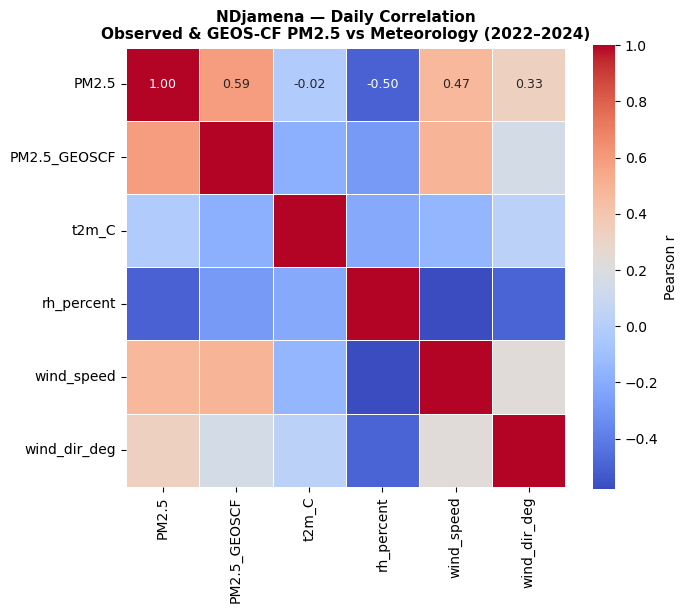

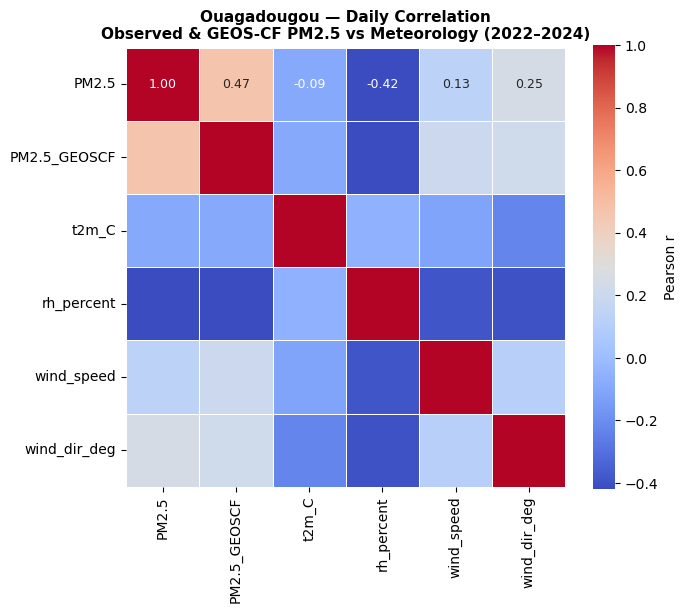

In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop through each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter date range and resample to daily
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df.set_index("Datetime", inplace=True)

    # Select variables
    columns_of_interest = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df = df[columns_of_interest].resample("D").mean().dropna()

    # Compute correlation matrix
    corr = df.corr().round(2)

    # Plot heatmap
    plt.figure(figsize=(7, 6))
    sns.heatmap(corr,
                annot=True,
                cmap="coolwarm",
                fmt=".2f",
                square=True,
                linewidths=0.5,
                cbar_kws={"label": "Pearson r"},
                annot_kws={"size": 9})

    plt.title(f"{city} — Daily Correlation\nObserved & GEOS-CF PM2.5 vs Meteorology (2022–2024)",
              fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()


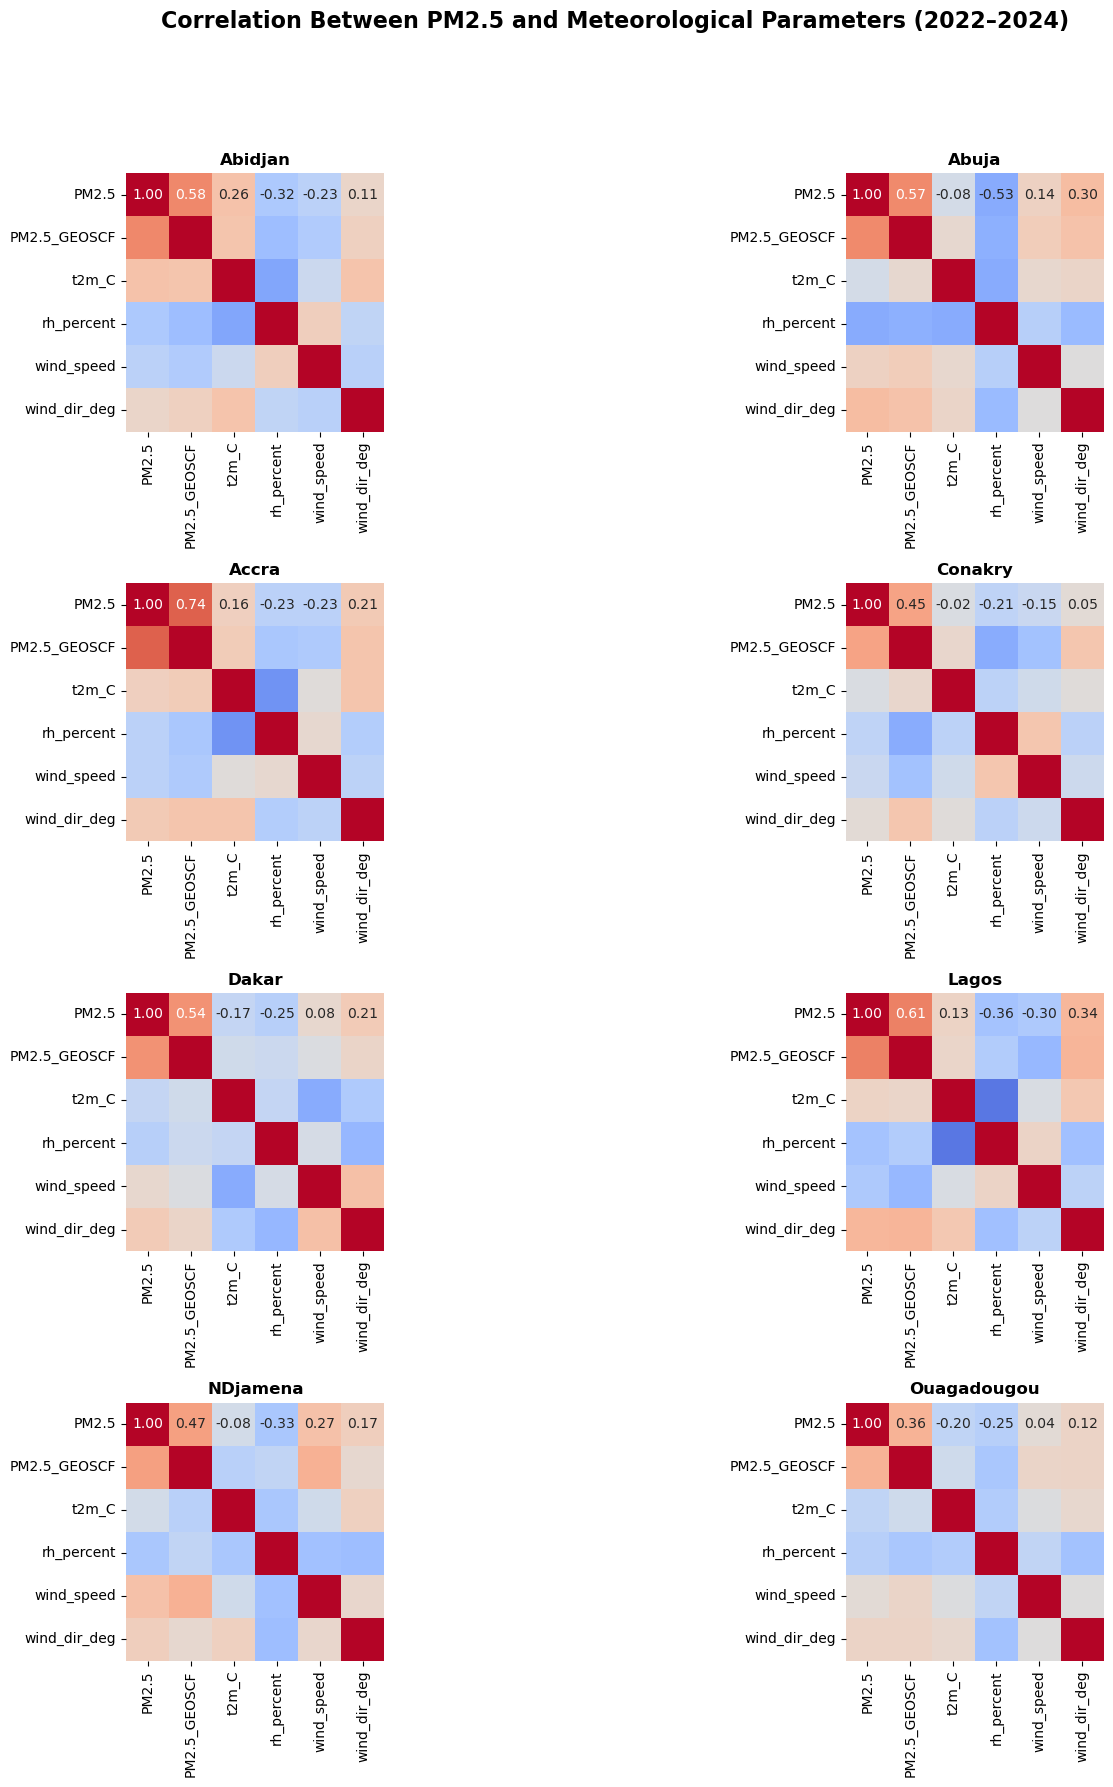

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Create Subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axs = axs.flatten()

# === Loop through cities ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and clean
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    
    # Select only relevant columns
    cols = ["PM2.5", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df_corr = df[cols].dropna()

    # Compute correlation
    corr_matrix = df_corr.corr()

    # Plot heatmap
    ax = axs[i]
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                cbar=False, square=True, ax=ax)
    ax.set_title(city, fontsize=12, fontweight='bold')

# === Final layout ===
fig.suptitle("Correlation Between PM2.5 and Meteorological Parameters (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


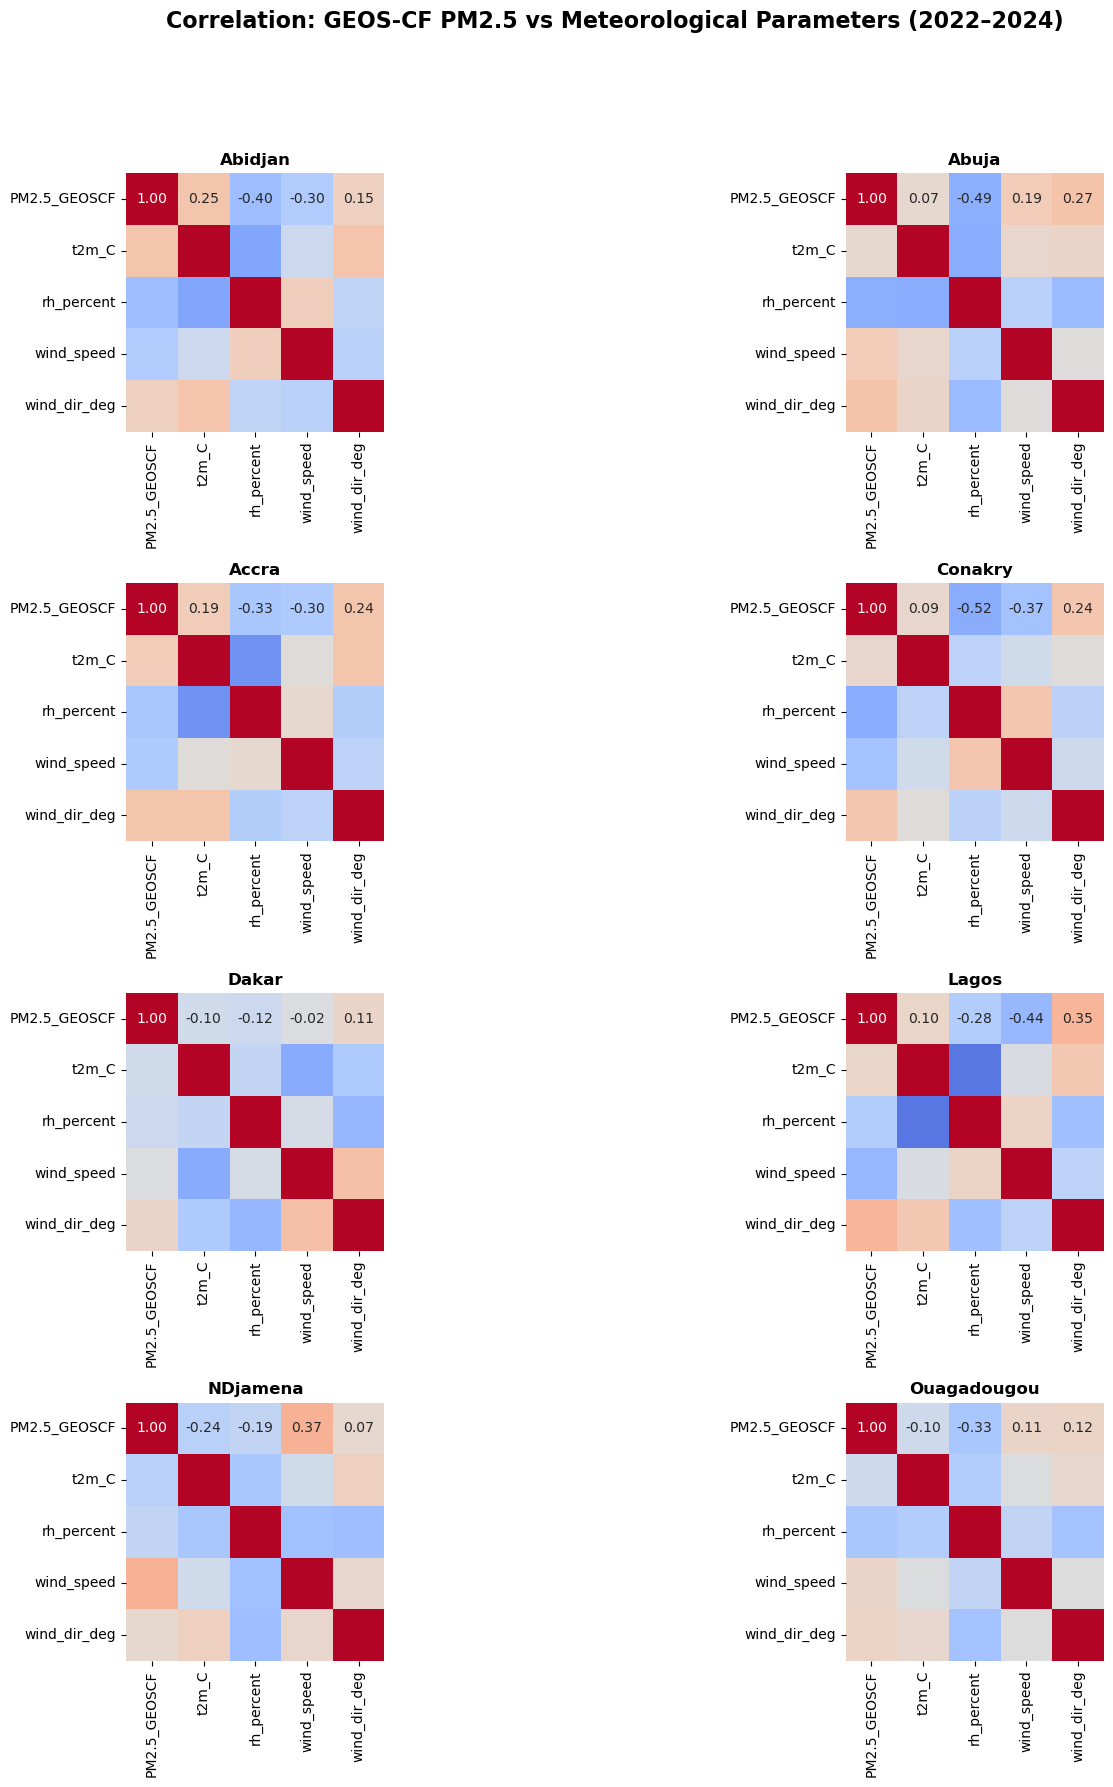

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Create Subplots ===
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axs = axs.flatten()

# === Loop through cities ===
for i, (city, filename) in enumerate(cities.items()):
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter by common time range
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]

    # Keep only relevant variables
    cols = ["PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]
    df_corr = df[cols].dropna()

    # Compute correlation matrix
    corr = df_corr.corr()

    # Plot
    ax = axs[i]
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                cbar=False, square=True, ax=ax)
    ax.set_title(f"{city}", fontsize=12, fontweight='bold')

# === Final layout ===
fig.suptitle("Correlation: GEOS-CF PM2.5 vs Meteorological Parameters (2022–2024)", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


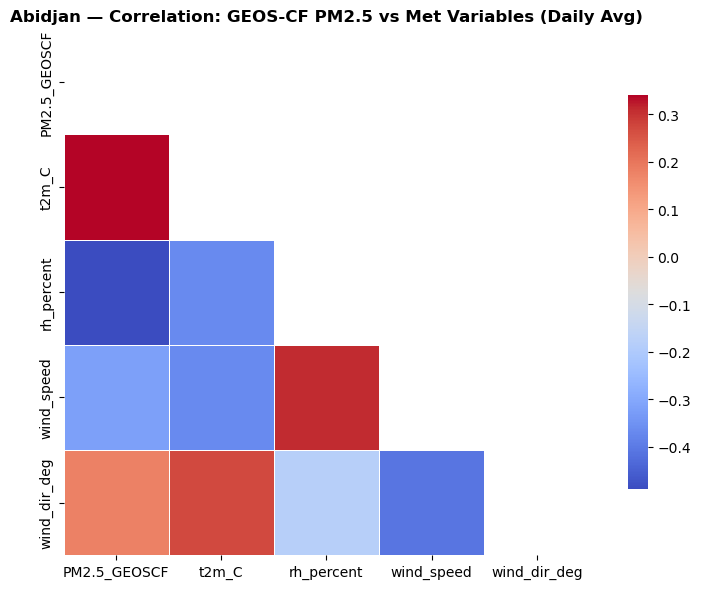

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


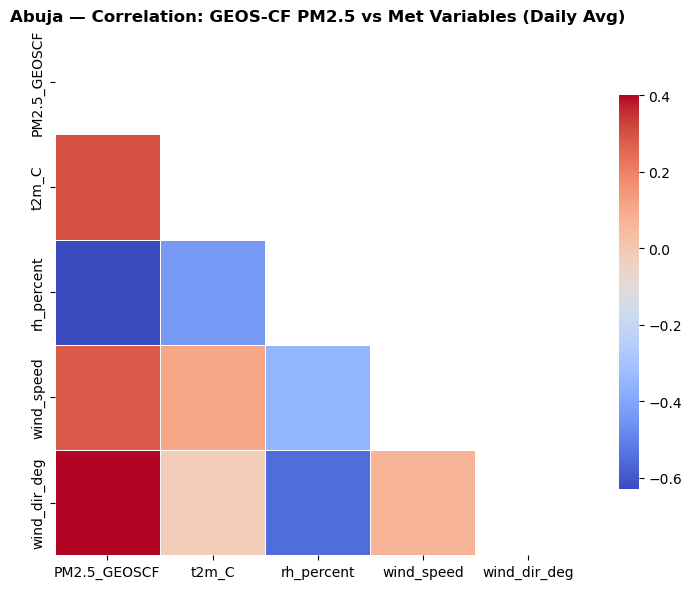

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


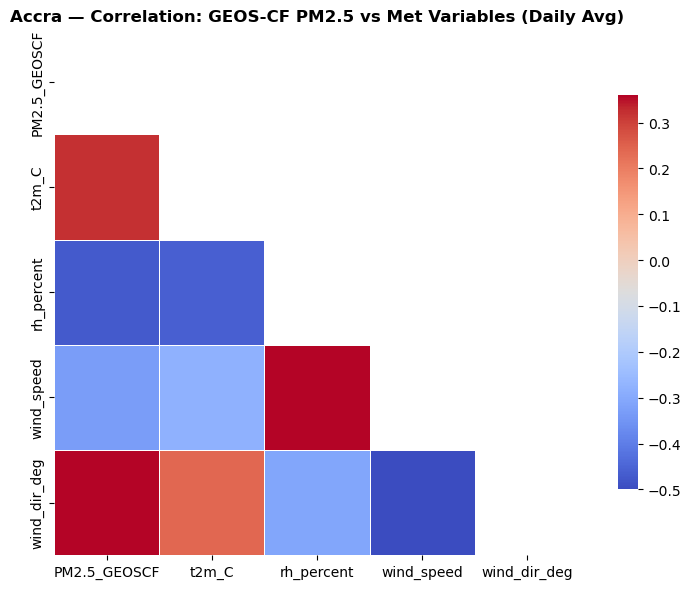

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


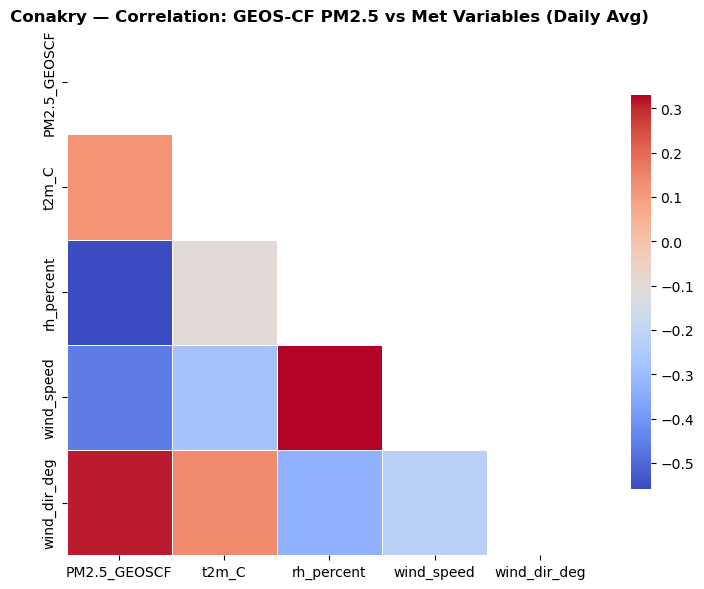

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


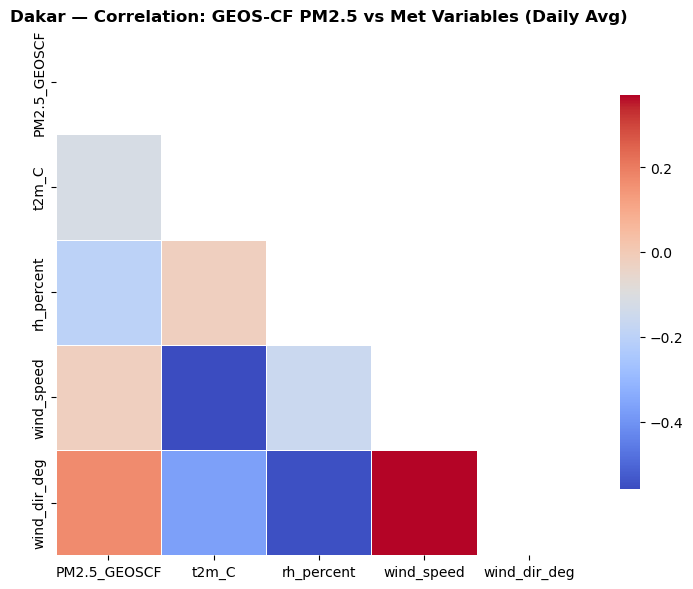

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


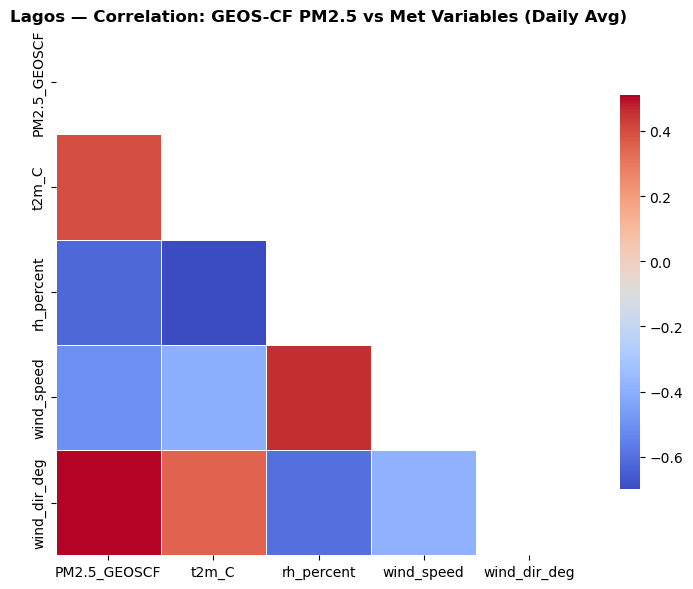

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


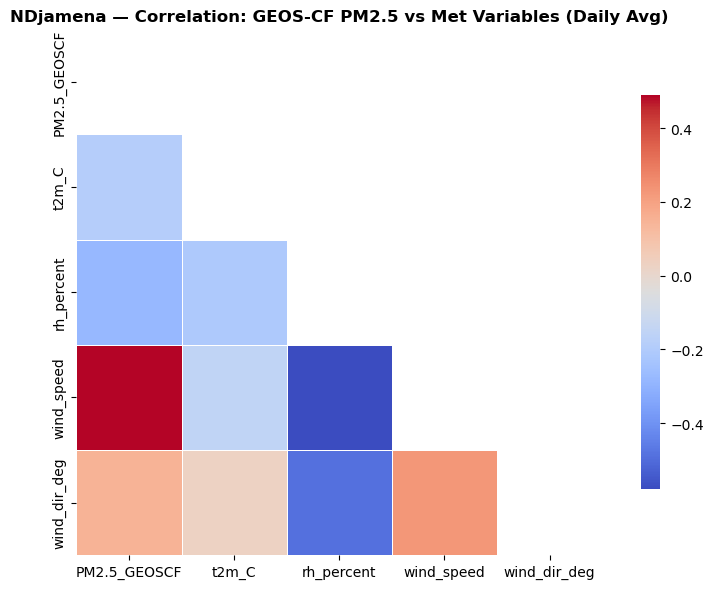

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


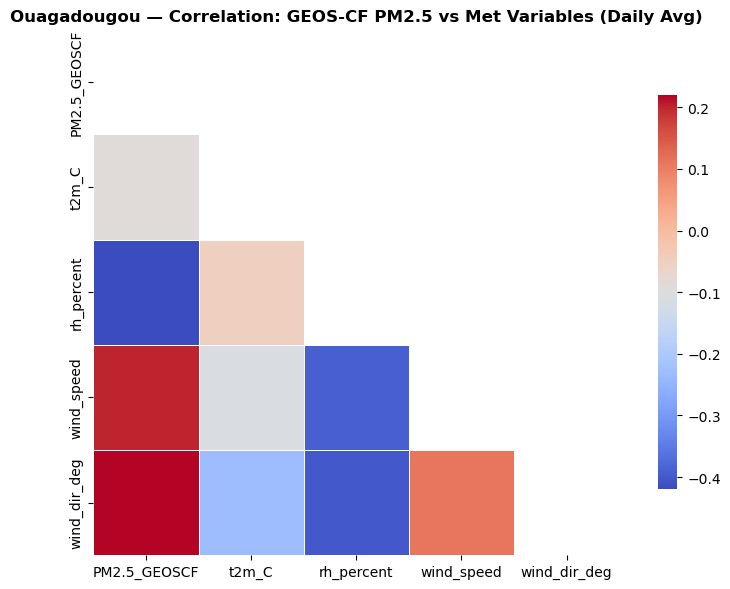

In [21]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Setup ===
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"  # <-- Your full dataset
start_time = pd.to_datetime("2022-03-30 13:00:00")
end_time = pd.to_datetime("2024-09-24 02:00:00")

cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

# === Loop over each city ===
for city, filename in cities.items():
    path = os.path.join(folder, filename)
    df = pd.read_csv(path, parse_dates=["Datetime"])

    # Filter and resample to daily average
    df = df[(df["Datetime"] >= start_time) & (df["Datetime"] <= end_time)]
    df_daily = df[["Datetime", "PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]].copy()
    df_daily = df_daily.set_index("Datetime").resample("D").mean().dropna()

    # Compute correlation matrix
    corr = df_daily.corr().round(2)

    # Generate mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # === Plot ===
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", square=True,
                cbar_kws={"shrink": .75}, linewidths=0.5, annot_kws={"size": 10})

    plt.title(f"{city} — Correlation: GEOS-CF PM2.5 vs Met Variables (Daily Avg)", fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()


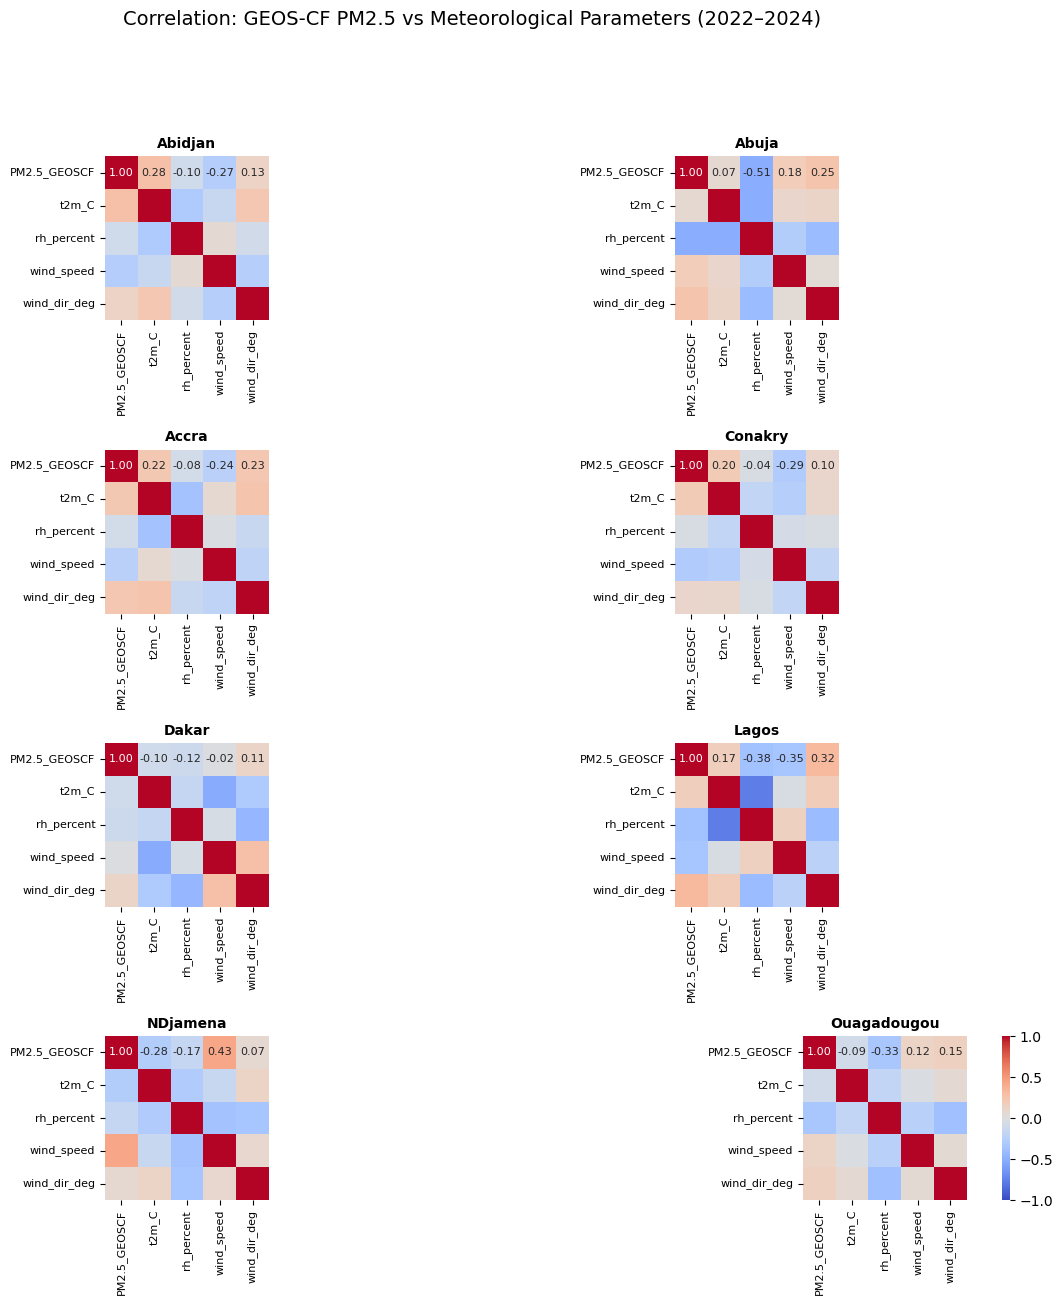

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS"
cities = {
    "Abidjan": "converted_Abidjan_to_UTC_withGEOSCF.csv",
    "Abuja": "converted_Abuja_to_UTC_withGEOSCF.csv",
    "Accra": "converted_Accra_PM2.5_2020_2025_withGEOSCF.csv",
    "Conakry": "converted_Conakry_to_UTC_withGEOSCF.csv",
    "Dakar": "converted_Dakar_to_UTC_withGEOSCF.csv",
    "Lagos": "converted_Lagos_to_UTC_withGEOSCF.csv",
    "NDjamena": "converted_NDjamena_to_UTC_withGEOSCF.csv",
    "Ouagadougou": "converted_Ouagadougou_to_UTC_withGEOSCF.csv"
}

params = ["PM2.5_GEOSCF", "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"]

# Subplots
fig, axs = plt.subplots(4, 2, figsize=(13, 13))
axs = axs.flatten()

# Plot
for i, (city, file) in enumerate(cities.items()):
    df = pd.read_csv(os.path.join(folder, file), parse_dates=["Datetime"])
    df = df[params].dropna()

    corr = df.corr().round(2)

    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        vmin=-1, vmax=1,
        ax=axs[i],
        square=True,
        cbar=(i == 7),  # show only on last subplot
        annot_kws={"size": 8}
    )
    axs[i].set_title(city, fontsize=10, fontweight='bold')
    axs[i].tick_params(labelsize=8)

# Adjust layout
plt.suptitle("Correlation: GEOS-CF PM2.5 vs Meteorological Parameters (2022–2024)", fontsize=14, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [16]:
pd.read_csv("C:/Users/ampon/Desktop/PYTHON/GEOS_DATA/NEWGEOS/Nan_Summary_by_Location.csv")

Location  Datetime  PM2.5  PM2.5_GEOSCF  t2m_C  \
0          Abidjan_to_UTC_withGEOSCF         0      0             1      1   
1            Abuja_to_UTC_withGEOSCF         0      0             1      1   
2   Accra_PM2.5_2020_2025_withGEOSCF         0      0            32     32   
3       AddisAbaba_to_UTC_withGEOSCF         0      0         15391  15391   
4          Algiers_to_UTC_withGEOSCF         0      0          7524   7524   
5     Antananarivo_to_UTC_withGEOSCF         0      0           468    468   
6           Bamako_to_UTC_withGEOSCF         0      0          2419   2419   
7         Cairo_PM2.5_UTC_withGEOSCF         0      0             1      1   
8          Conakry_to_UTC_withGEOSCF         0      0           588    588   
9            Dakar_to_UTC_withGEOSCF         0      0             1      1   
10         Kampala_to_UTC_withGEOSCF         0      0         23969  23969   
11          Kigali_to_UTC_withGEOSCF         0      0             1      1   
12        Kinshasa_to_UTC_withGEOSCF         0      0             1      1   
13           Lagos_to_UTC_withGEOSCF         0      0             1      1   
14      Libreville_to_UTC_withGEOSCF         0      0             1      1   
15            Lome_to_UTC_withGEOSCF         0      0             1      1   
16        NDjamena_to_UTC_withGEOSCF         0      0             1      1   
17     Ouagadougou_to_UTC_withGEOSCF         0      0             3      3   

    rh_percent  wind_speed  wind_dir_deg  
0            1           1             1  
1            1           1             1  
2           32          32            32  
3        15391       15391         15391  
4         7524        7524          7524  
5          468         468           468  
6         2419        2419          2419  
7            1           1             1  
8          588         588           588  
9            1           1             1  
10       23969       23969         23969  
11           1           1             1  
12           1           1             1  
13           1           1             1  
14           1           1             1  
15           1           1             1  
16           1           1             1  
17           3           3             3

In [6]:
import os
import pandas as pd
import numpy as np

# === Folder paths ===
data_folder = "C:/Users/ampon/Desktop/PYTHON/GEOS_DATA"
output_folder = os.path.join(data_folder, "NEWGEOS")
os.makedirs(output_folder, exist_ok=True)

# === Loop through files ===
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(data_folder, file)
        print(f"📂 Processing: {file}")

        # Load file
        df = pd.read_csv(file_path)

        # Ensure datetime
        df["Datetime"] = pd.to_datetime(df["Datetime"])

        # Perform conversions
        df["t2m_C"] = df["t2m_GEOSCF"] - 273.15
        df["rh_percent"] = df["rh_GEOSCF"] * 100
        df["wind_speed"] = np.sqrt(df["u10m_GEOSCF"]**2 + df["v10m_GEOSCF"]**2)
        df["wind_dir_deg"] = (np.arctan2(df["u10m_GEOSCF"], df["v10m_GEOSCF"]) * 180 / np.pi) % 360

        # Final output columns
        final_df = df[[
            "Datetime", "PM2.5", "PM2.5_GEOSCF",
            "t2m_C", "rh_percent", "wind_speed", "wind_dir_deg"
        ]]

        # Save
        output_file = os.path.join(output_folder, f"converted_{file}")
        final_df.to_csv(output_file, index=False)

        print(f"✅ Saved: {output_file}")

print("🎉 Done! Now includes PM2.5 and PM2.5_GEOSCF.")


📂 Processing: Abidjan_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Abidjan_to_UTC_withGEOSCF.csv
📂 Processing: Abuja_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Abuja_to_UTC_withGEOSCF.csv
📂 Processing: Accra_PM2.5_2020_2025_withGEOSCF.csv


C:\Users\ampon\AppData\Local\Temp\ipykernel_13052\751850588.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Datetime"] = pd.to_datetime(df["Datetime"])


✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Accra_PM2.5_2020_2025_withGEOSCF.csv
📂 Processing: AddisAbaba_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_AddisAbaba_to_UTC_withGEOSCF.csv
📂 Processing: Algiers_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Algiers_to_UTC_withGEOSCF.csv
📂 Processing: Antananarivo_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Antananarivo_to_UTC_withGEOSCF.csv
📂 Processing: Bamako_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Bamako_to_UTC_withGEOSCF.csv
📂 Processing: Cairo_PM2.5_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Cairo_PM2.5_UTC_withGEOSCF.csv
📂 Processing: Conakry_to_UTC_withGEOSCF.csv
✅ Saved: C:/Users/ampon/Desktop/PYTHON/GEOS_DATA\NEWGEOS\converted_Conakry_to_UTC_withGEOSCF.csv
📂 Processing: Dakar_to_UTC_withGEO